# Importando Bibliotecas

In [260]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
color = ['#ED72A3','#8565F0','#22559C', '#F27370','#FA9856','#EDE862']


# Função

In [261]:
def rotulo(axes):
  for retangulo in axes.patches:
    bar_value = retangulo.get_height()
    text = f'{bar_value:,.1f}'
    axes.text(retangulo.get_x() + retangulo.get_width() / 2,
            np.nan_to_num(retangulo.get_height() + 22),
            text,
            ha = 'center',rotation=90, size=12, color='black')

# Carregando Dados

In [262]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')

In [263]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Informação

In [264]:
print(df.shape)
print(df.duplicated().sum())

tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(tabela)

(1470, 35)
0


Unique  Null  NullPercent    Type
Age                           43     0          0.0   int64
Attrition                      2     0          0.0  object
BusinessTravel                 3     0          0.0  object
DailyRate                    886     0          0.0   int64
Department                     3     0          0.0  object
DistanceFromHome              29     0          0.0   int64
Education                      5     0          0.0   int64
EducationField                 6     0          0.0  object
EmployeeCount                  1     0          0.0   int64
EmployeeNumber              1470     0          0.0   int64
EnvironmentSatisfaction        4     0          0.0   int64
Gender                         2     0          0.0  object
HourlyRate                    71     0          0.0   int64
JobInvolvement                 4     0          0.0   int64
JobLevel                       5     0          0.0   int64
JobRole                        9     0          0.0  object
JobSatisfaction                4     0          0.0   int64
MaritalStatus                  3     0          0.0  object
MonthlyIncome               1349     0          0.0   int64
MonthlyRate                 1427     0          0.0   int64
NumCompaniesWorked            10     0          0.0   int64
Over18                         1     0          0.0  object
OverTime                       2     0          0.0  object
PercentSalaryHike             15     0          0.0   int64
PerformanceRating              2     0          0.0   int64
RelationshipSatisfaction       4     0          0.0   int64
StandardHours                  1     0          0.0   int64
StockOptionLevel               4     0          0.0   int64
TotalWorkingYears             40     0          0.0   int64
TrainingTimesLastYear          7     0          0.0   int64
WorkLifeBalance                4     0          0.0   int64
YearsAtCompany                37     0          0.0   int64
YearsInCurrentRole            19     0          0.0   int64
YearsSinceLastPromotion       16     0          0.0   int64
YearsWithCurrManager          18     0          0.0   int64

# Transformação

In [265]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

In [266]:
num = df.select_dtypes(exclude='O')
num.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  

[3 rows x 23 columns]

In [267]:
cat = df.select_dtypes(include='O')
cat.head(3)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes

In [268]:
print(df.shape)
print(num.shape)
print(cat.shape)

(1470, 31)
(1470, 23)
(1470, 8)


# Gráfico

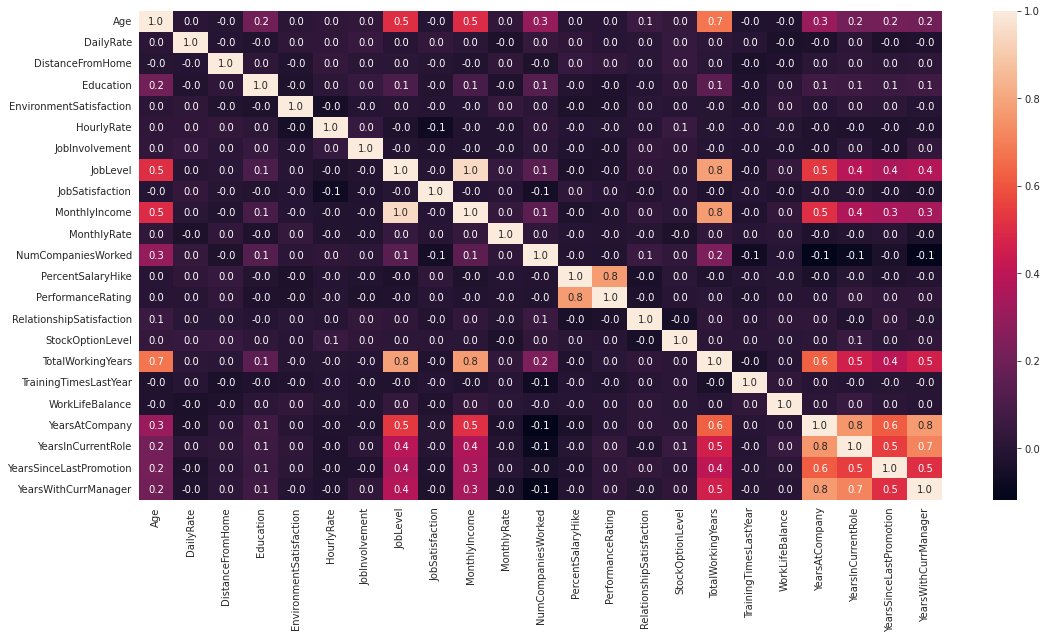

In [269]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

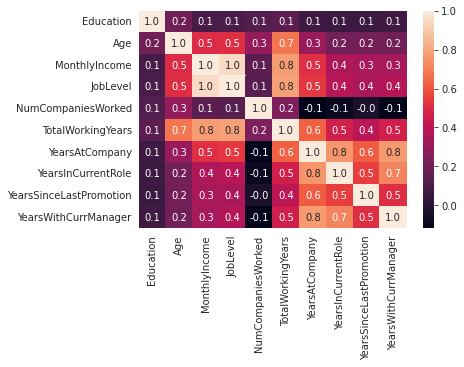

In [270]:
# correlação forte entre as colunas
colunas = ['Education','Age','MonthlyIncome','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
sns.heatmap(df[colunas].corr(), annot=True, fmt='.1f')

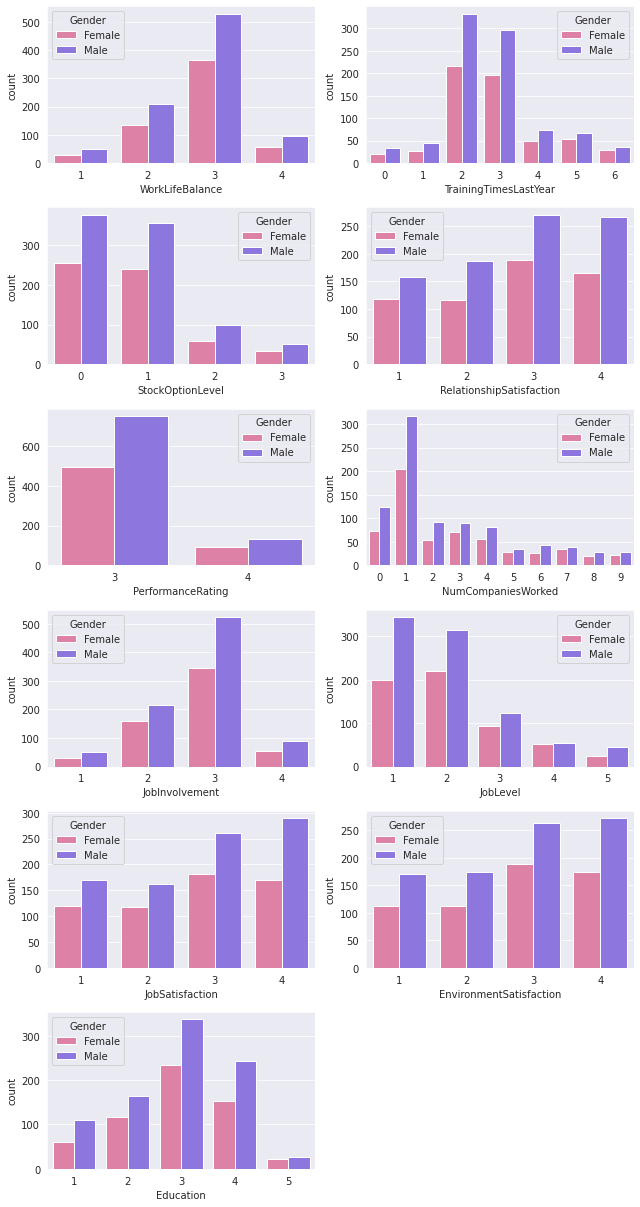

In [271]:
colunas = ['WorkLifeBalance','TrainingTimesLastYear','StockOptionLevel',
    'RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']

plt.figure(figsize=(9,36))
for i,col in enumerate(colunas):
    axes = plt.subplot(13,2, i + 1)
    sns.countplot(x=df[col], hue=df['Gender'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

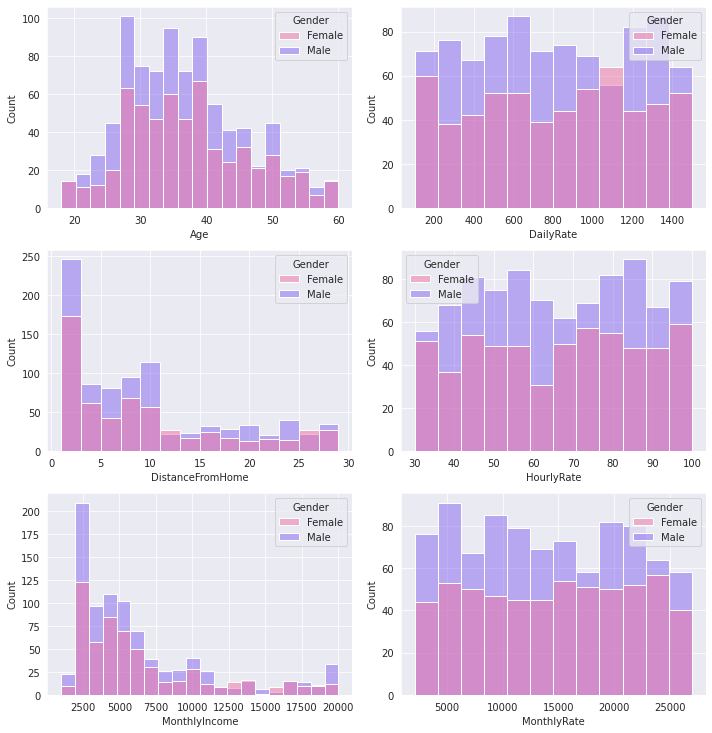

In [272]:
hist = ['Age', 'DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
       'MonthlyRate']

plt.figure(figsize=(10,20))
for i,col in enumerate(hist):
    axes = plt.subplot(6,2, i + 1)
    sns.histplot(x=df[col], hue=df['Gender'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

## Correlação entre os anos

### Total de anos trabalhados?

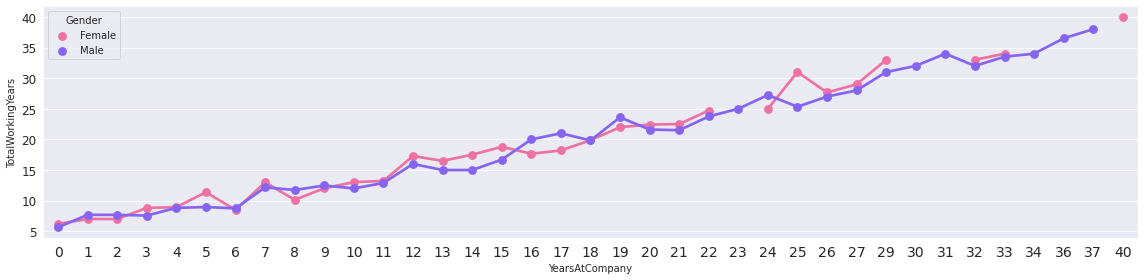

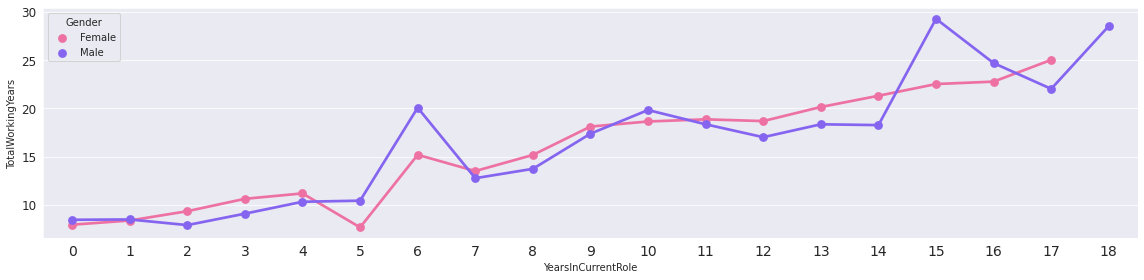

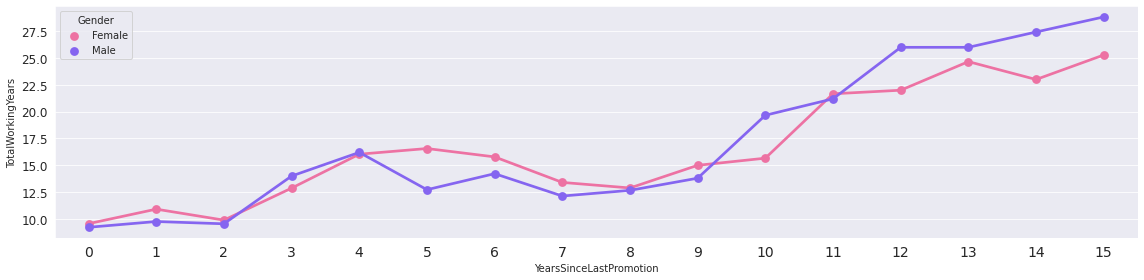

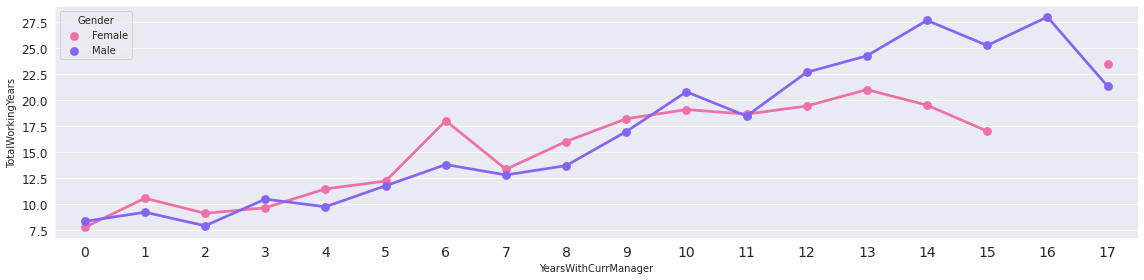

In [273]:
# Correlação: Total de Anos de Trabalho
colunas = ['YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=df[i], y=df['TotalWorkingYears'], hue=df['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

### Anos na empresa

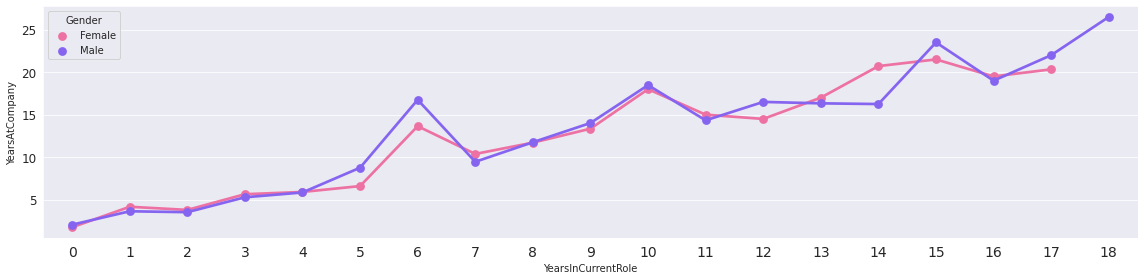

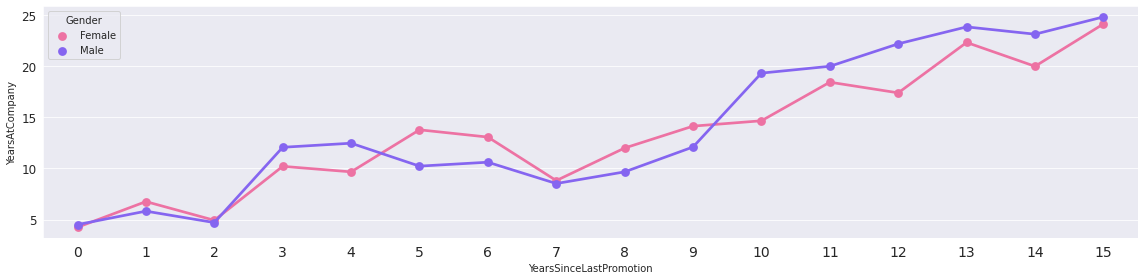

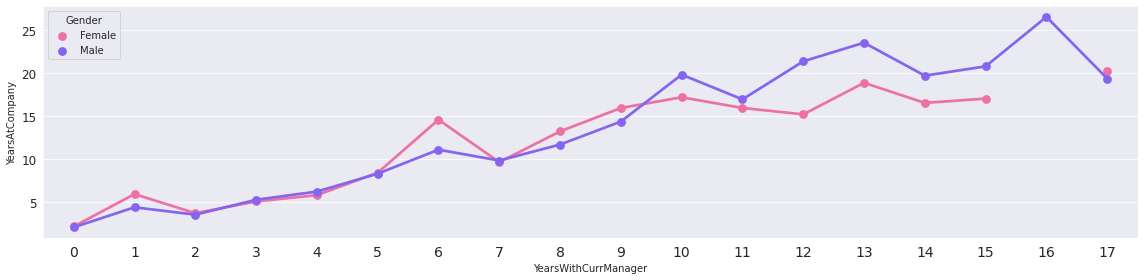

In [274]:
# Correlação: Anos na Empresa
colunas = ['YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=df[i], y=df['YearsAtCompany'], hue=df['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

### Anos na função atual?

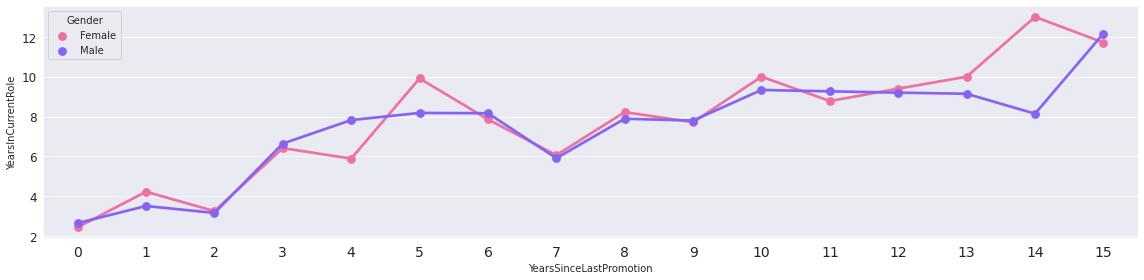

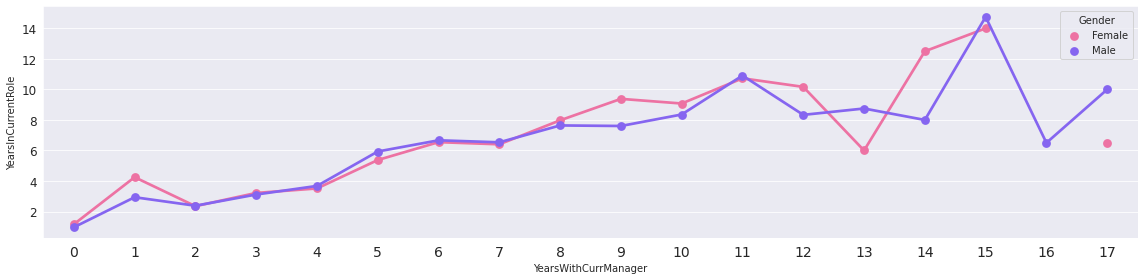

In [275]:
# Correlação: Anos na função atual
colunas = ['YearsSinceLastPromotion','YearsWithCurrManager']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=df[i], y=df['YearsInCurrentRole'], hue=df['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

## Renda Mensal

### Renda mensal por anos de trabalho

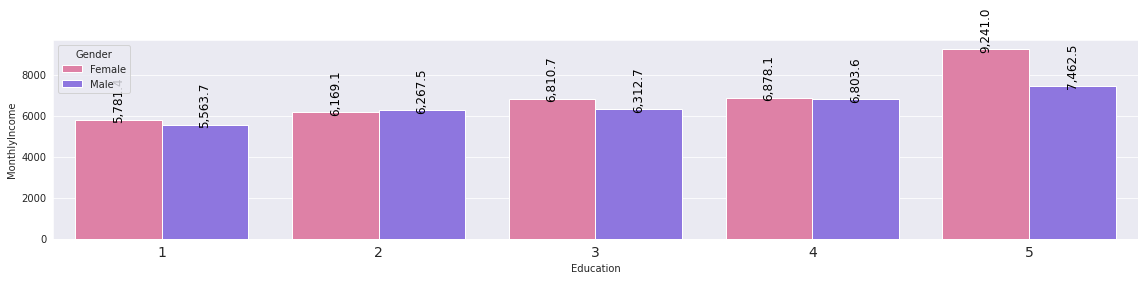

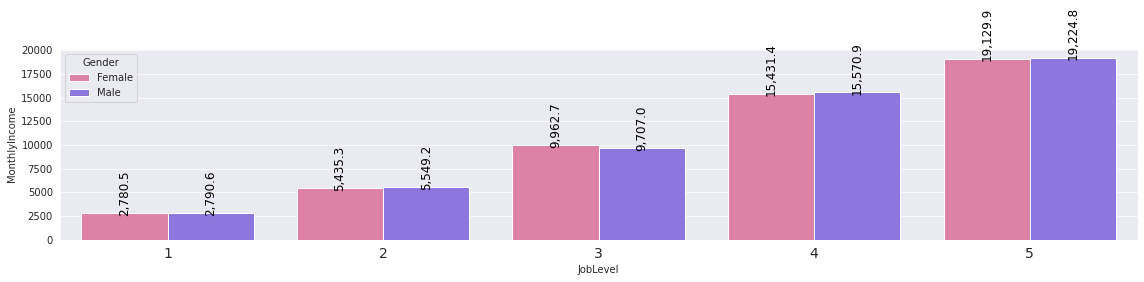

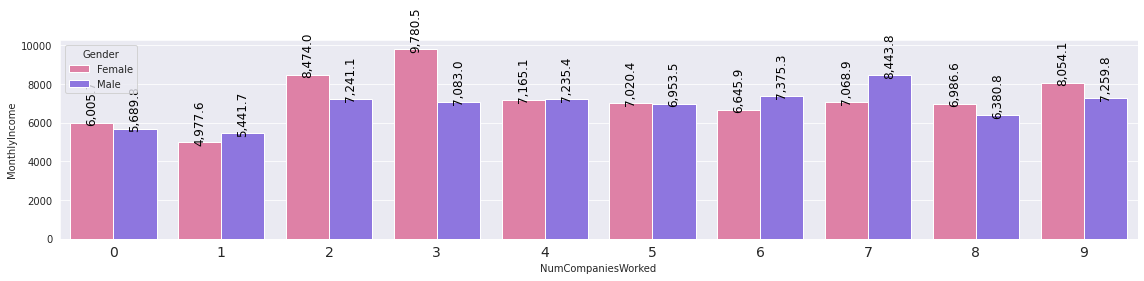

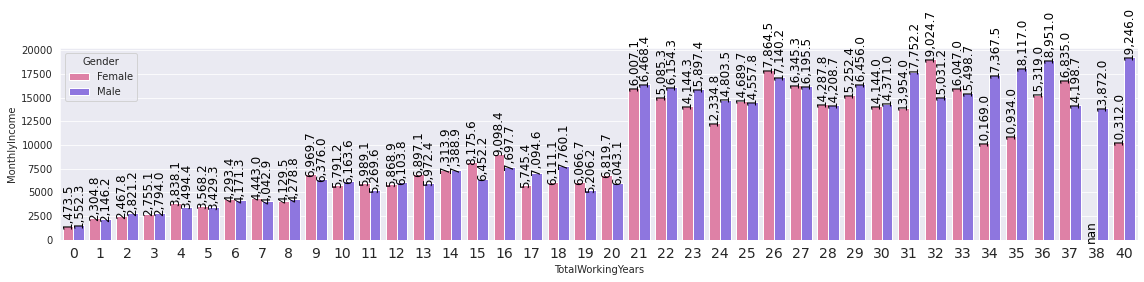

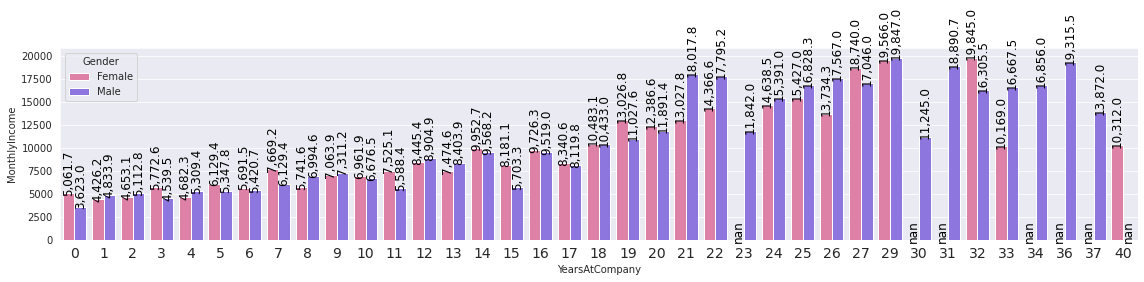

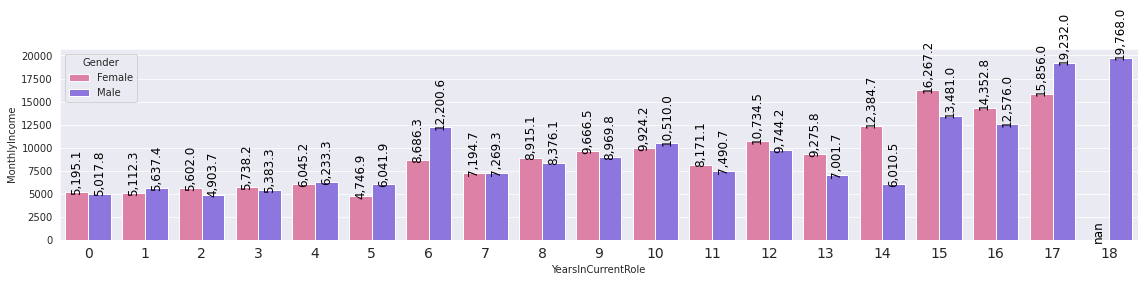

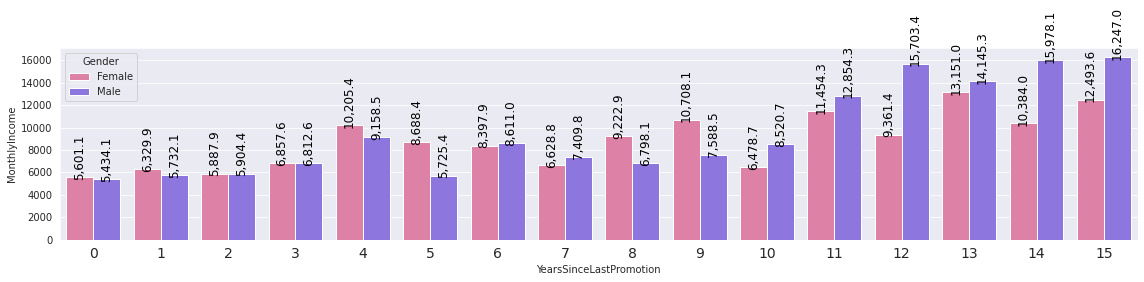

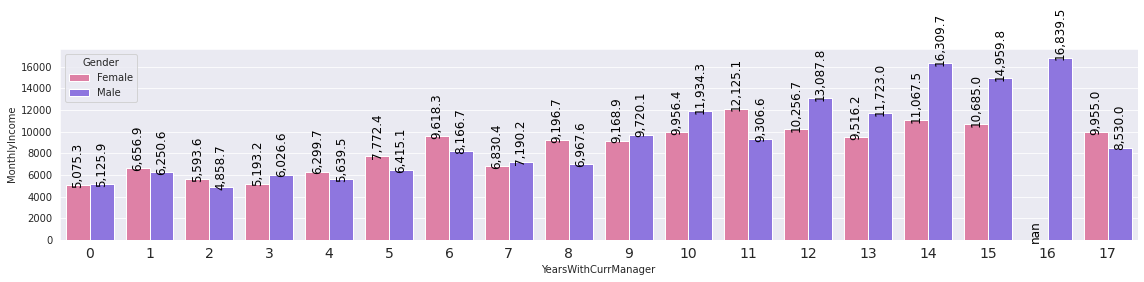

In [276]:
colunas = ['Education','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    rotulo(axes) # função de rótulos nas barras
    plt.tight_layout()
    plt.show()

### Renda mensal por Atrito

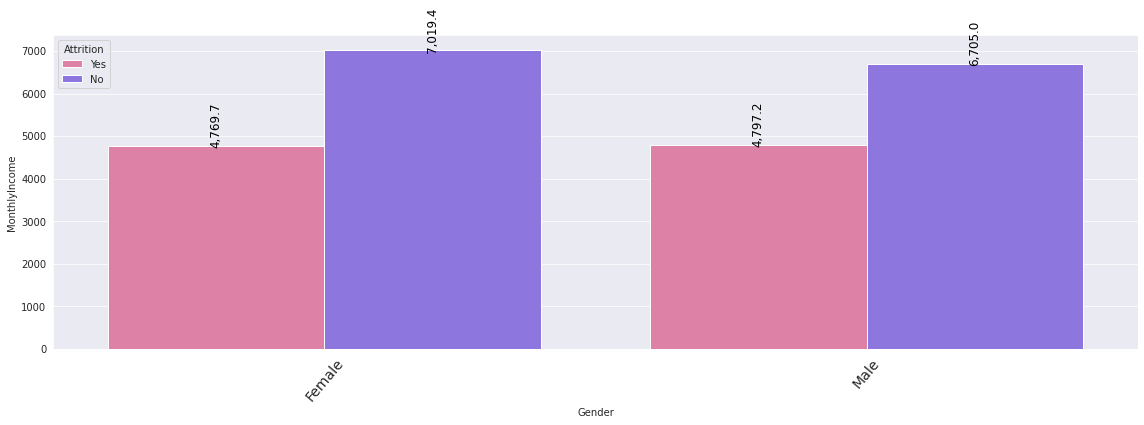

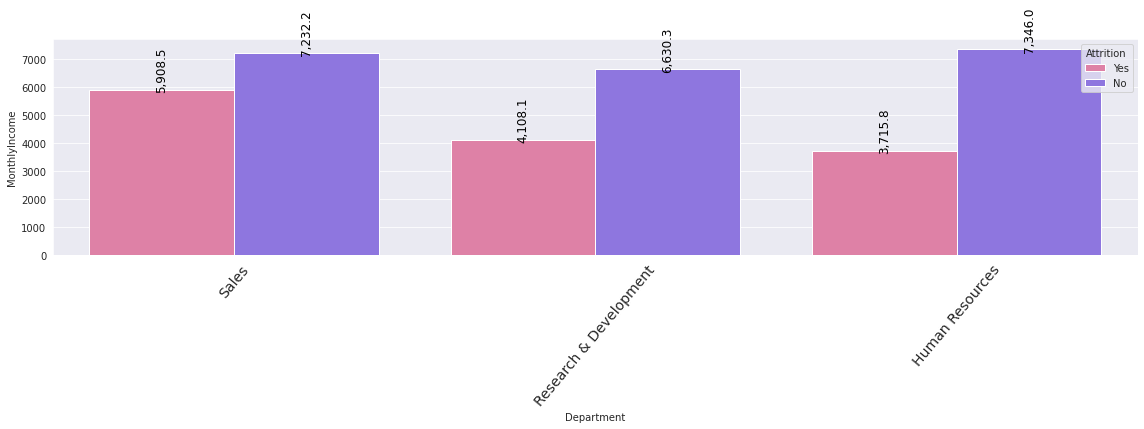

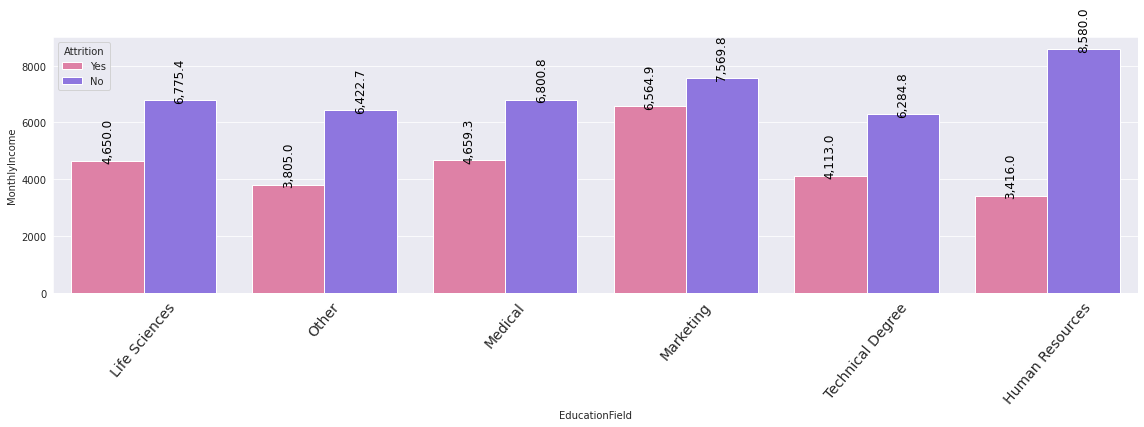

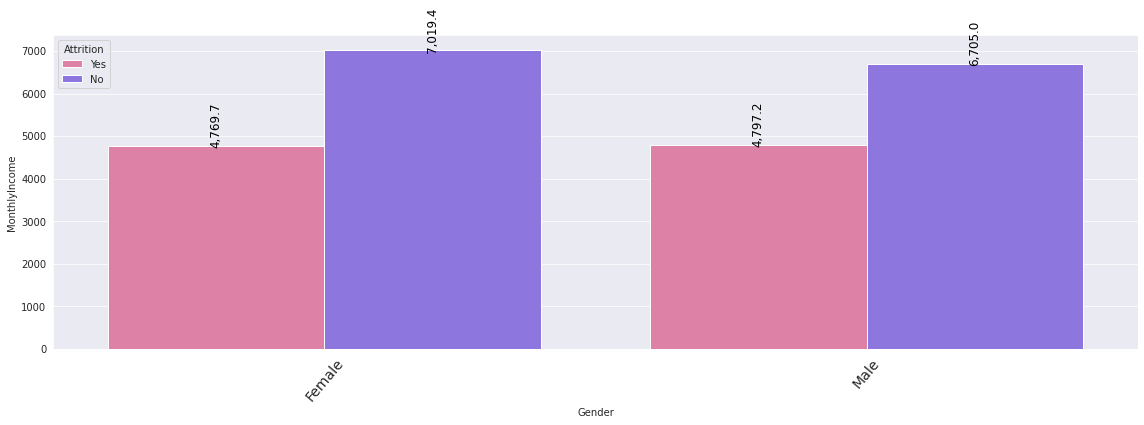

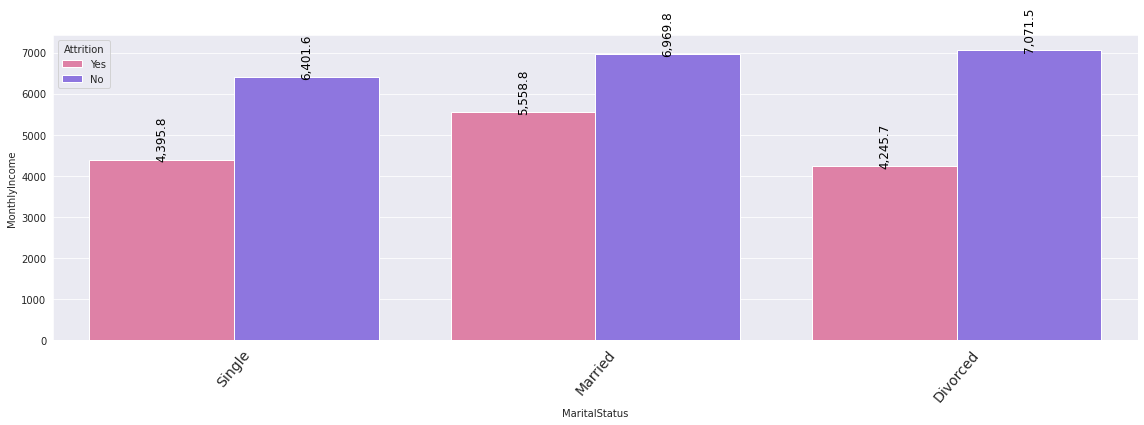

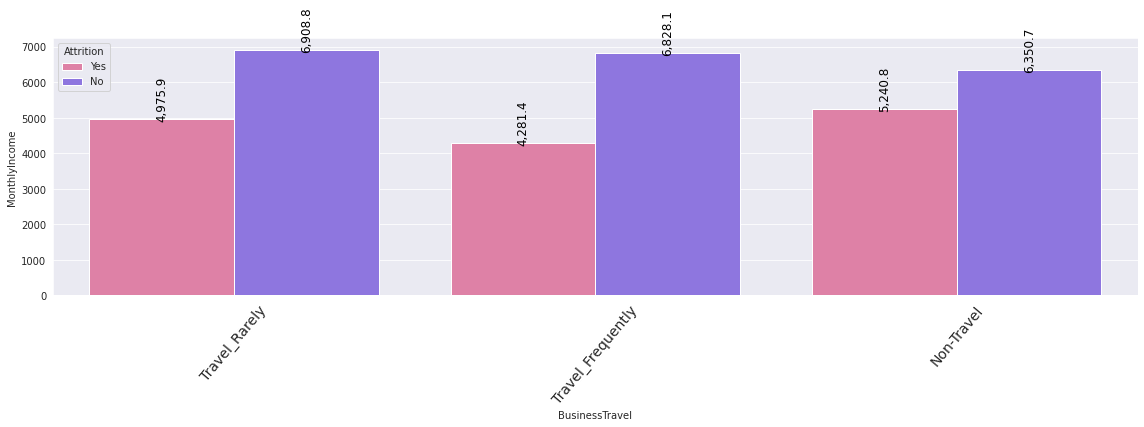

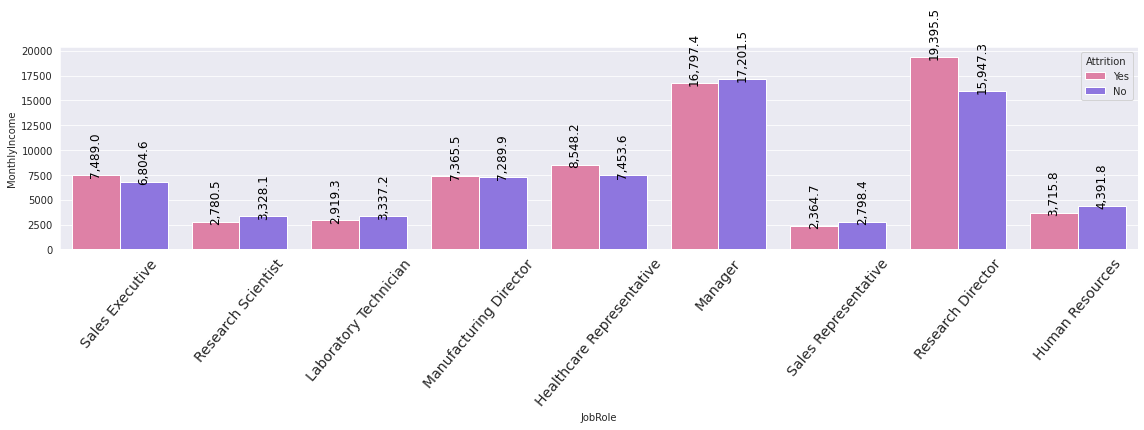

In [277]:
colunas = ['Gender','Department','EducationField','Gender','MaritalStatus','BusinessTravel','JobRole']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['Attrition'], palette=color, ci=None)
    plt.xticks(rotation=50,fontsize=14)
    rotulo(axes)
    plt.tight_layout()
    plt.show()

### Renda mensal vs Hora extra

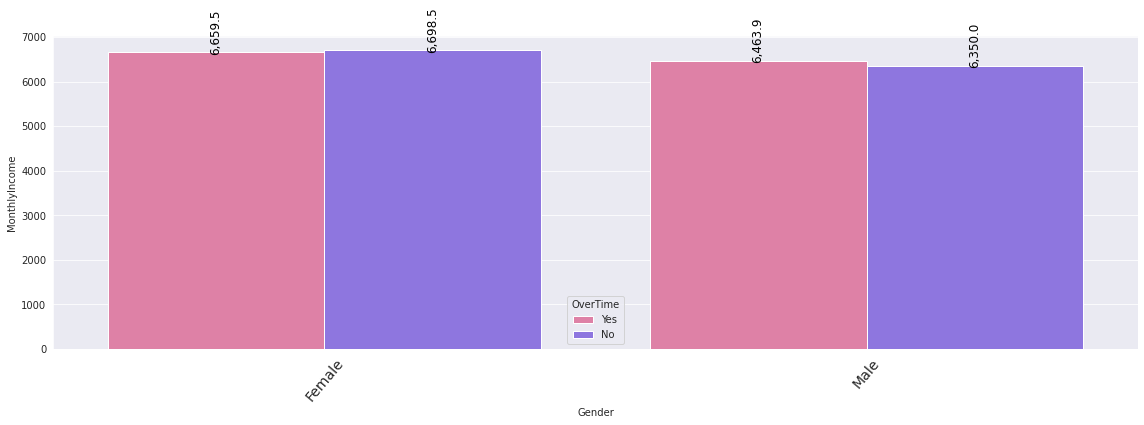

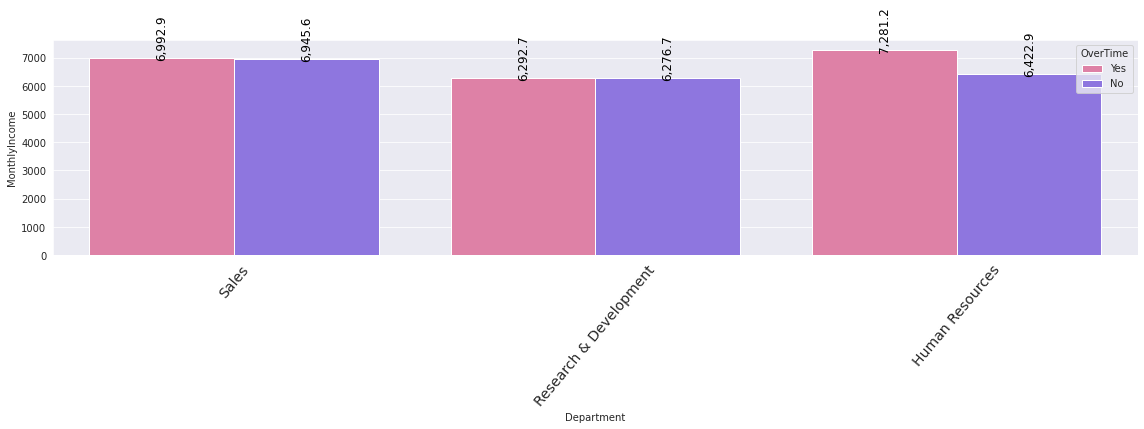

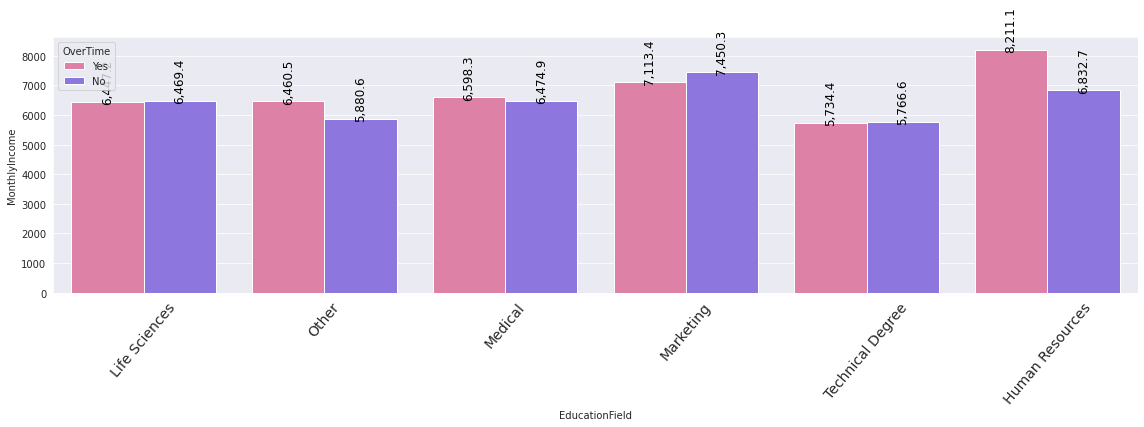

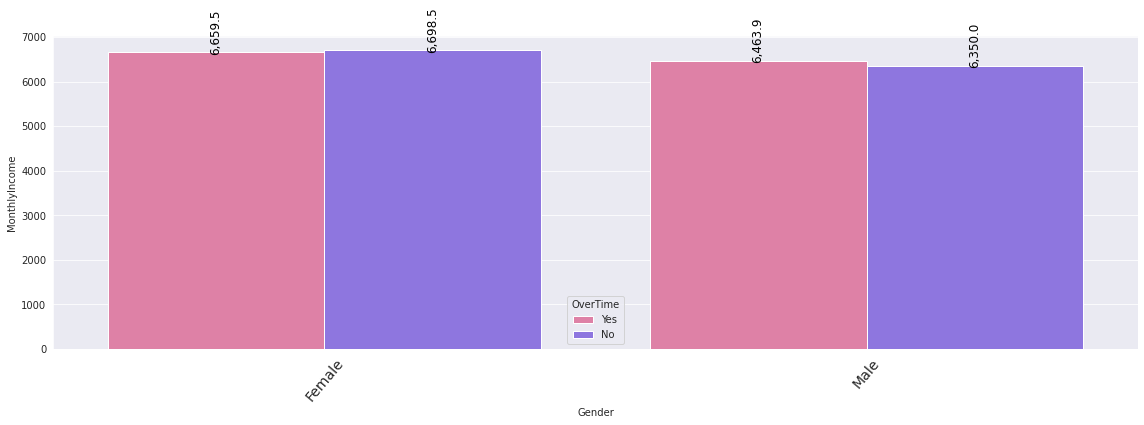

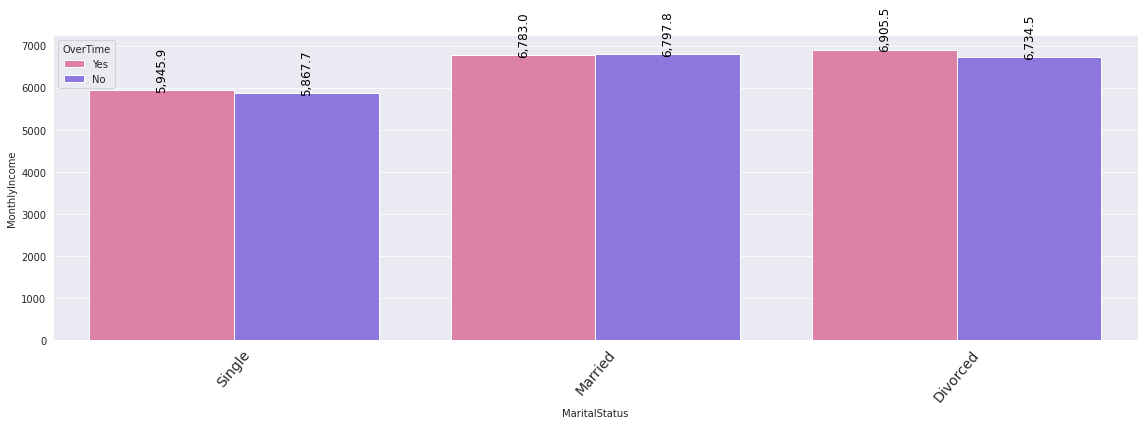

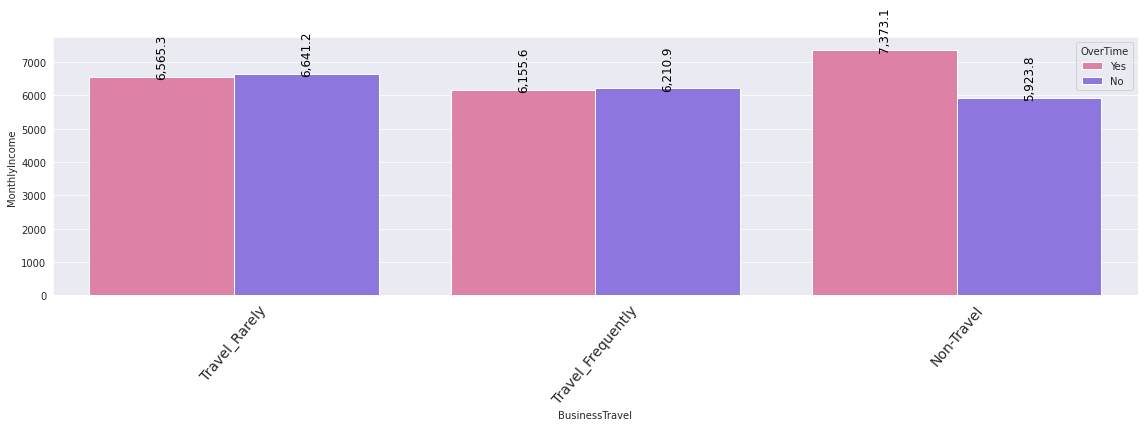

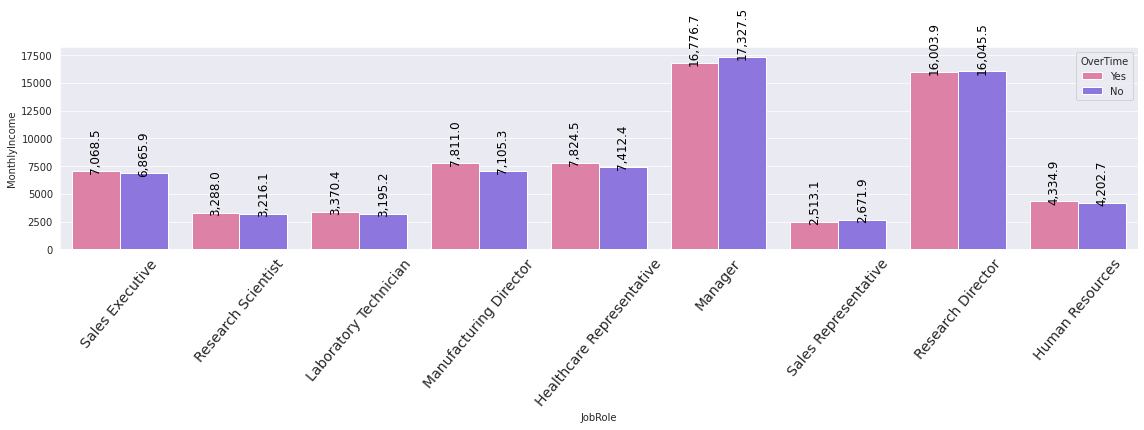

In [278]:
colunas = ['Gender','Department','EducationField','Gender','MaritalStatus','BusinessTravel','JobRole']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['OverTime'], palette=color, ci=None)
    plt.xticks(rotation=50,fontsize=14)
    rotulo(axes)
    plt.tight_layout()
    plt.show()

### Renda mensal por estado civil

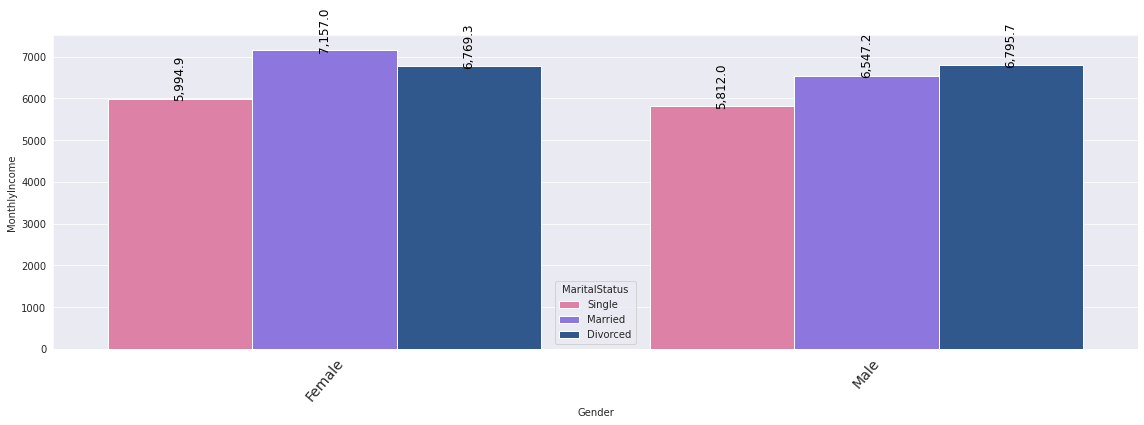

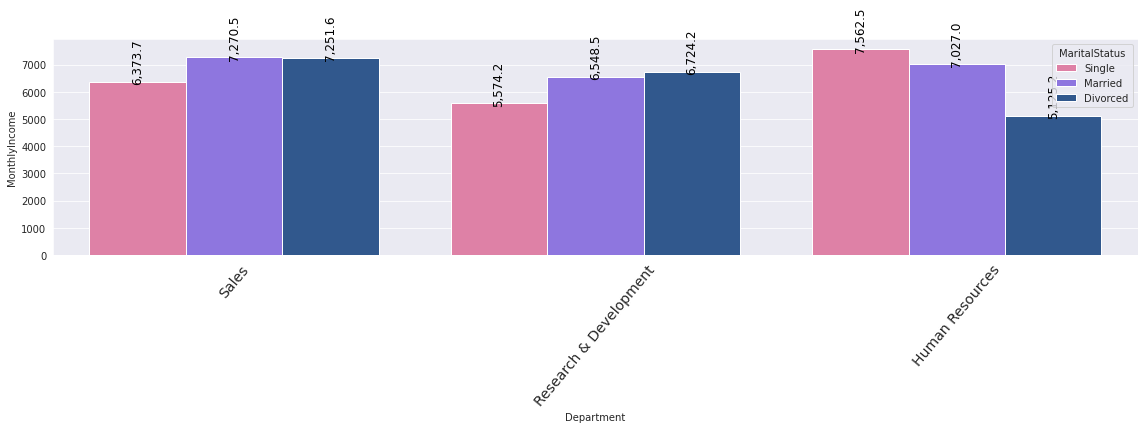

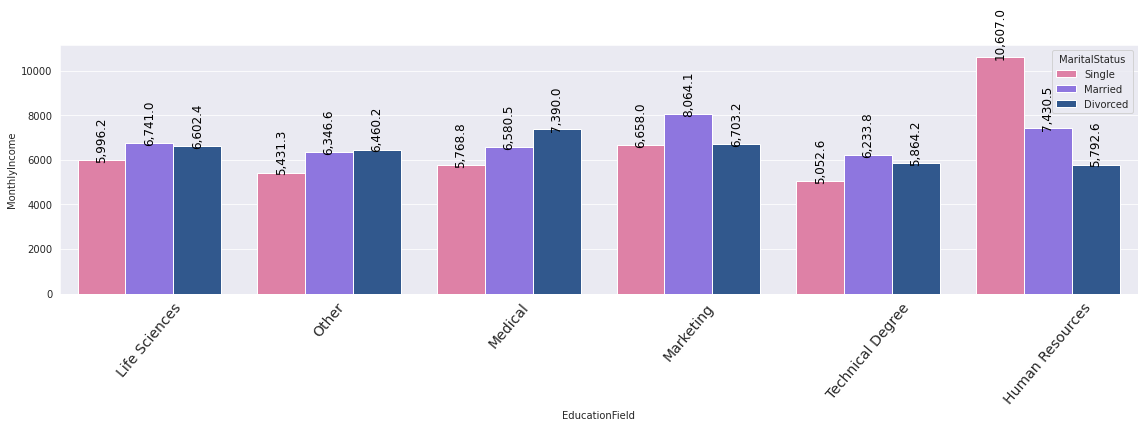

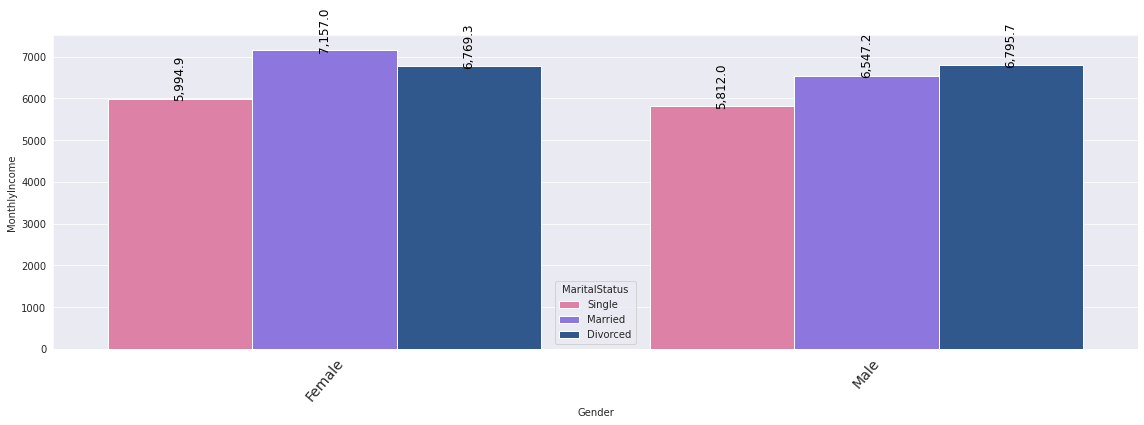

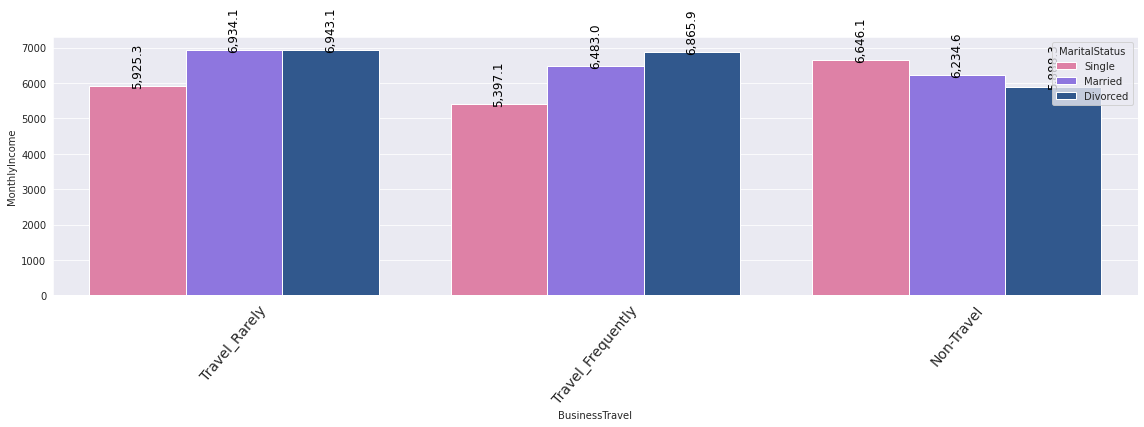

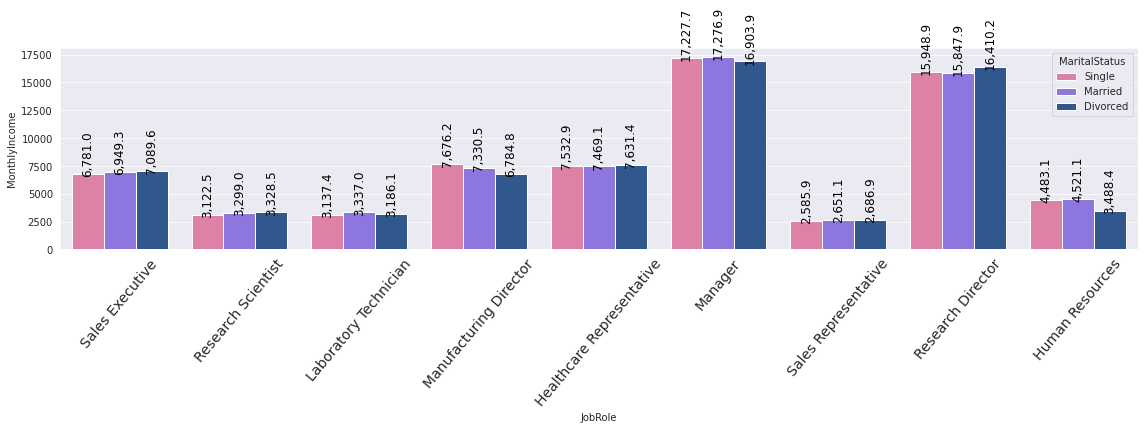

In [279]:
colunas = ['Gender','Department','EducationField','Gender','BusinessTravel','JobRole']

for i in colunas:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['MaritalStatus'], palette=color, ci=None)
    plt.xticks(rotation=50,fontsize=14)
    rotulo(axes)
    plt.tight_layout()
    plt.show()

### Porcentagem de Atributos 

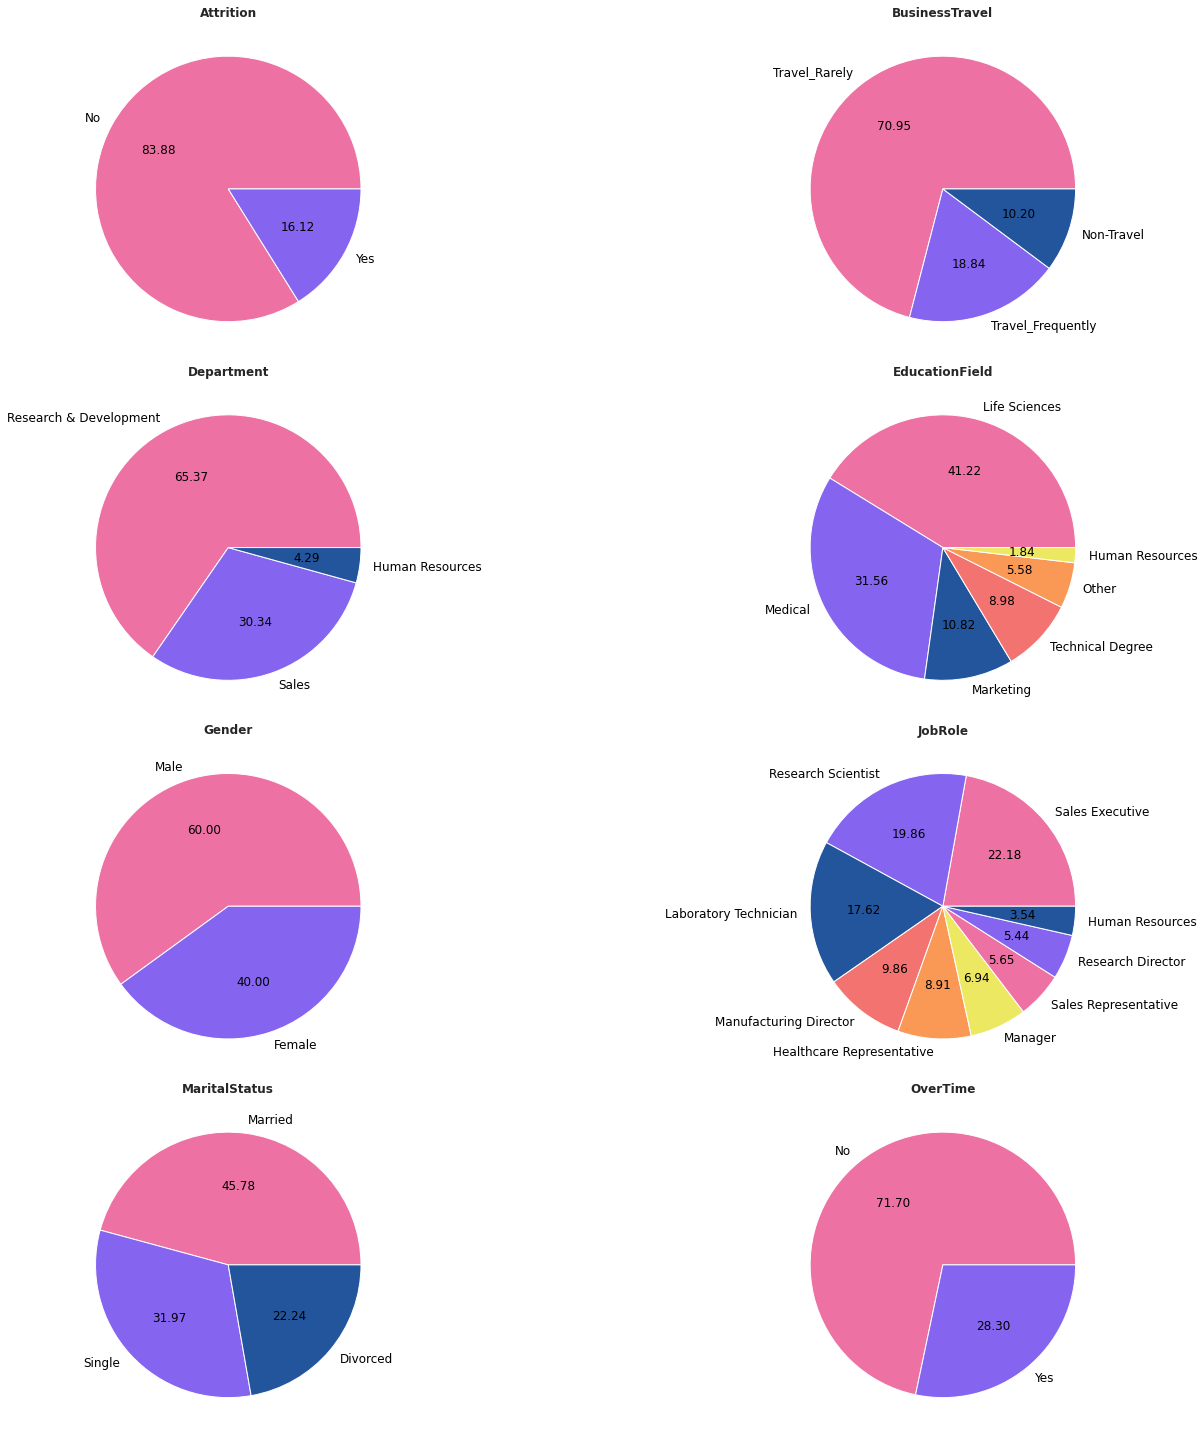

In [280]:
cat = df.select_dtypes(include='O')
plt.figure(figsize=(20,40))
for i,col in enumerate(cat):
    axes = plt.subplot(8,2, i + 1)
    df[col].value_counts().plot.pie(autopct='%.2f', colors=color,textprops={'size':12,'color':'black'})
    plt.title(col,fontsize=12, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Porcentagem de atributos por gênero

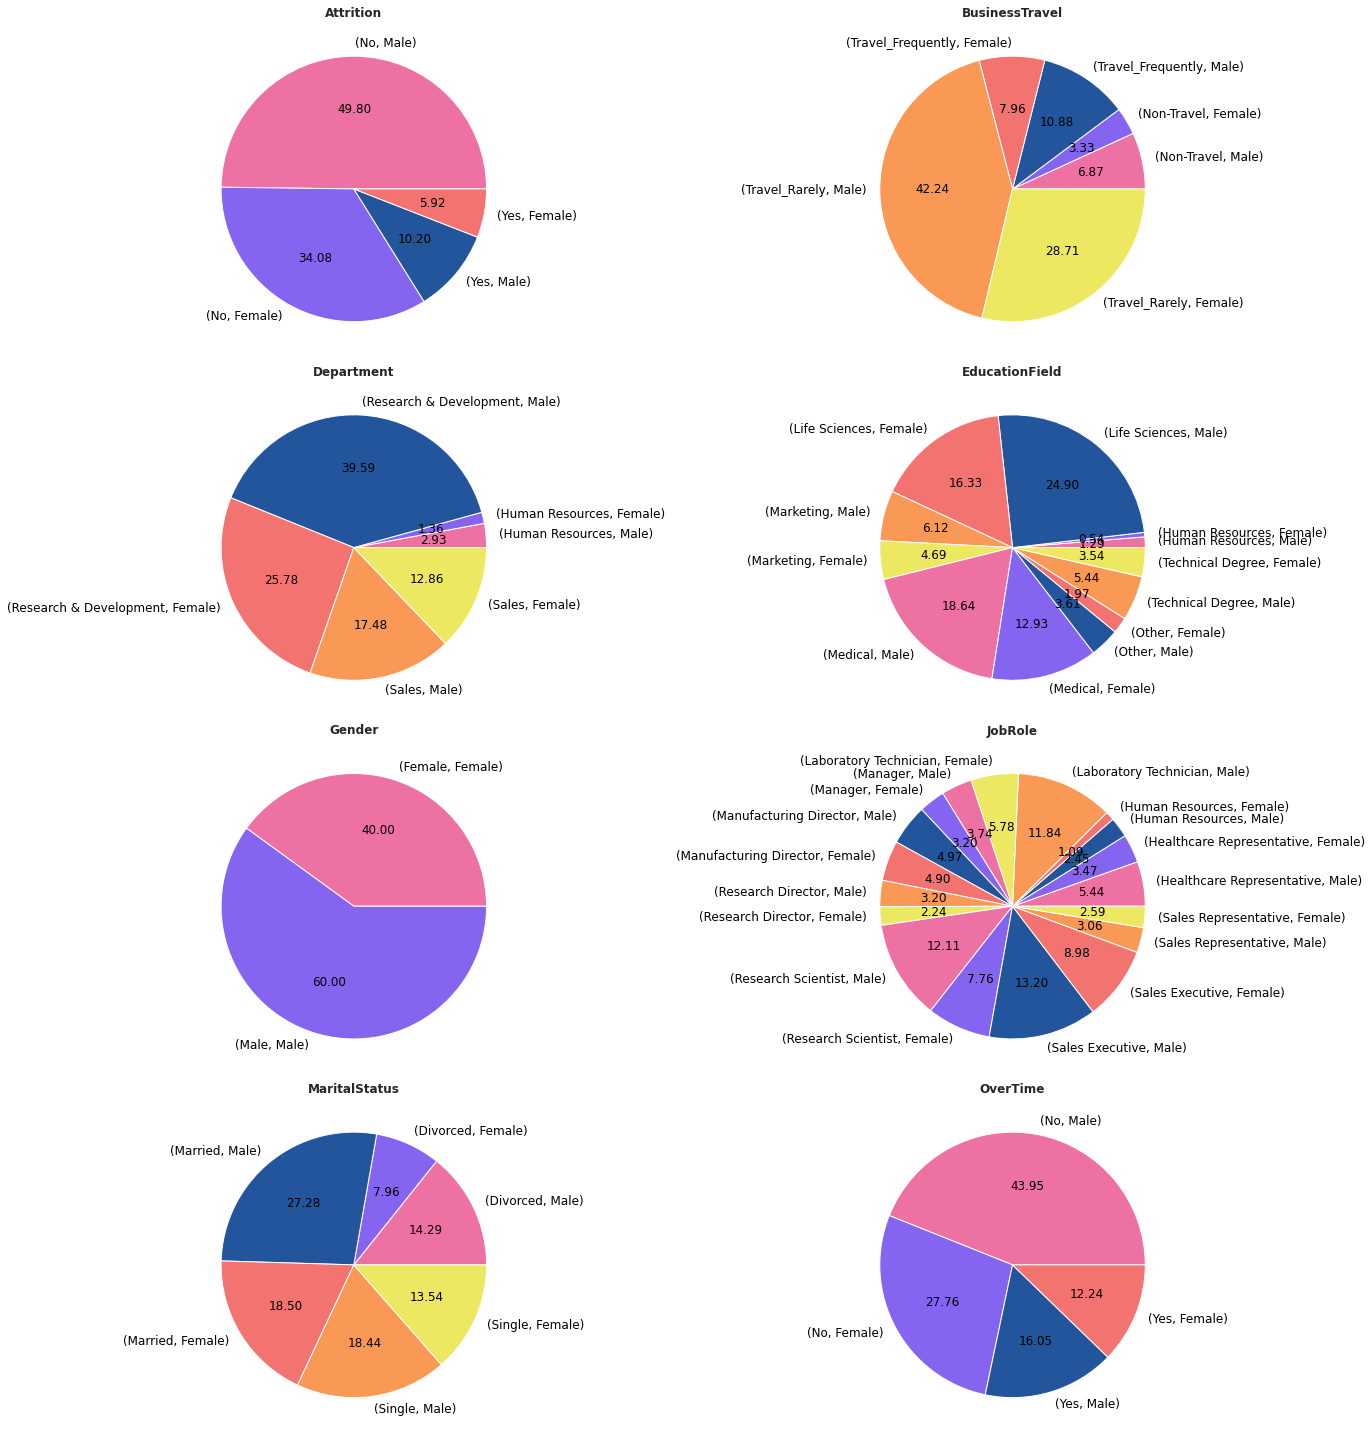

In [281]:
cat = df.select_dtypes(include='O')
plt.figure(figsize=(20,40))
for i,col in enumerate(cat):
    axes = plt.subplot(8,2, i + 1)
    df.groupby([col])['Gender'].value_counts().plot.pie(autopct='%.2f', colors=color,textprops={'size':12,'color':'black'})
    plt.title(col,fontsize=12, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Facet Grid

### Renda mensal de quem trabalhou por mais tempo pelo nível de trabalho

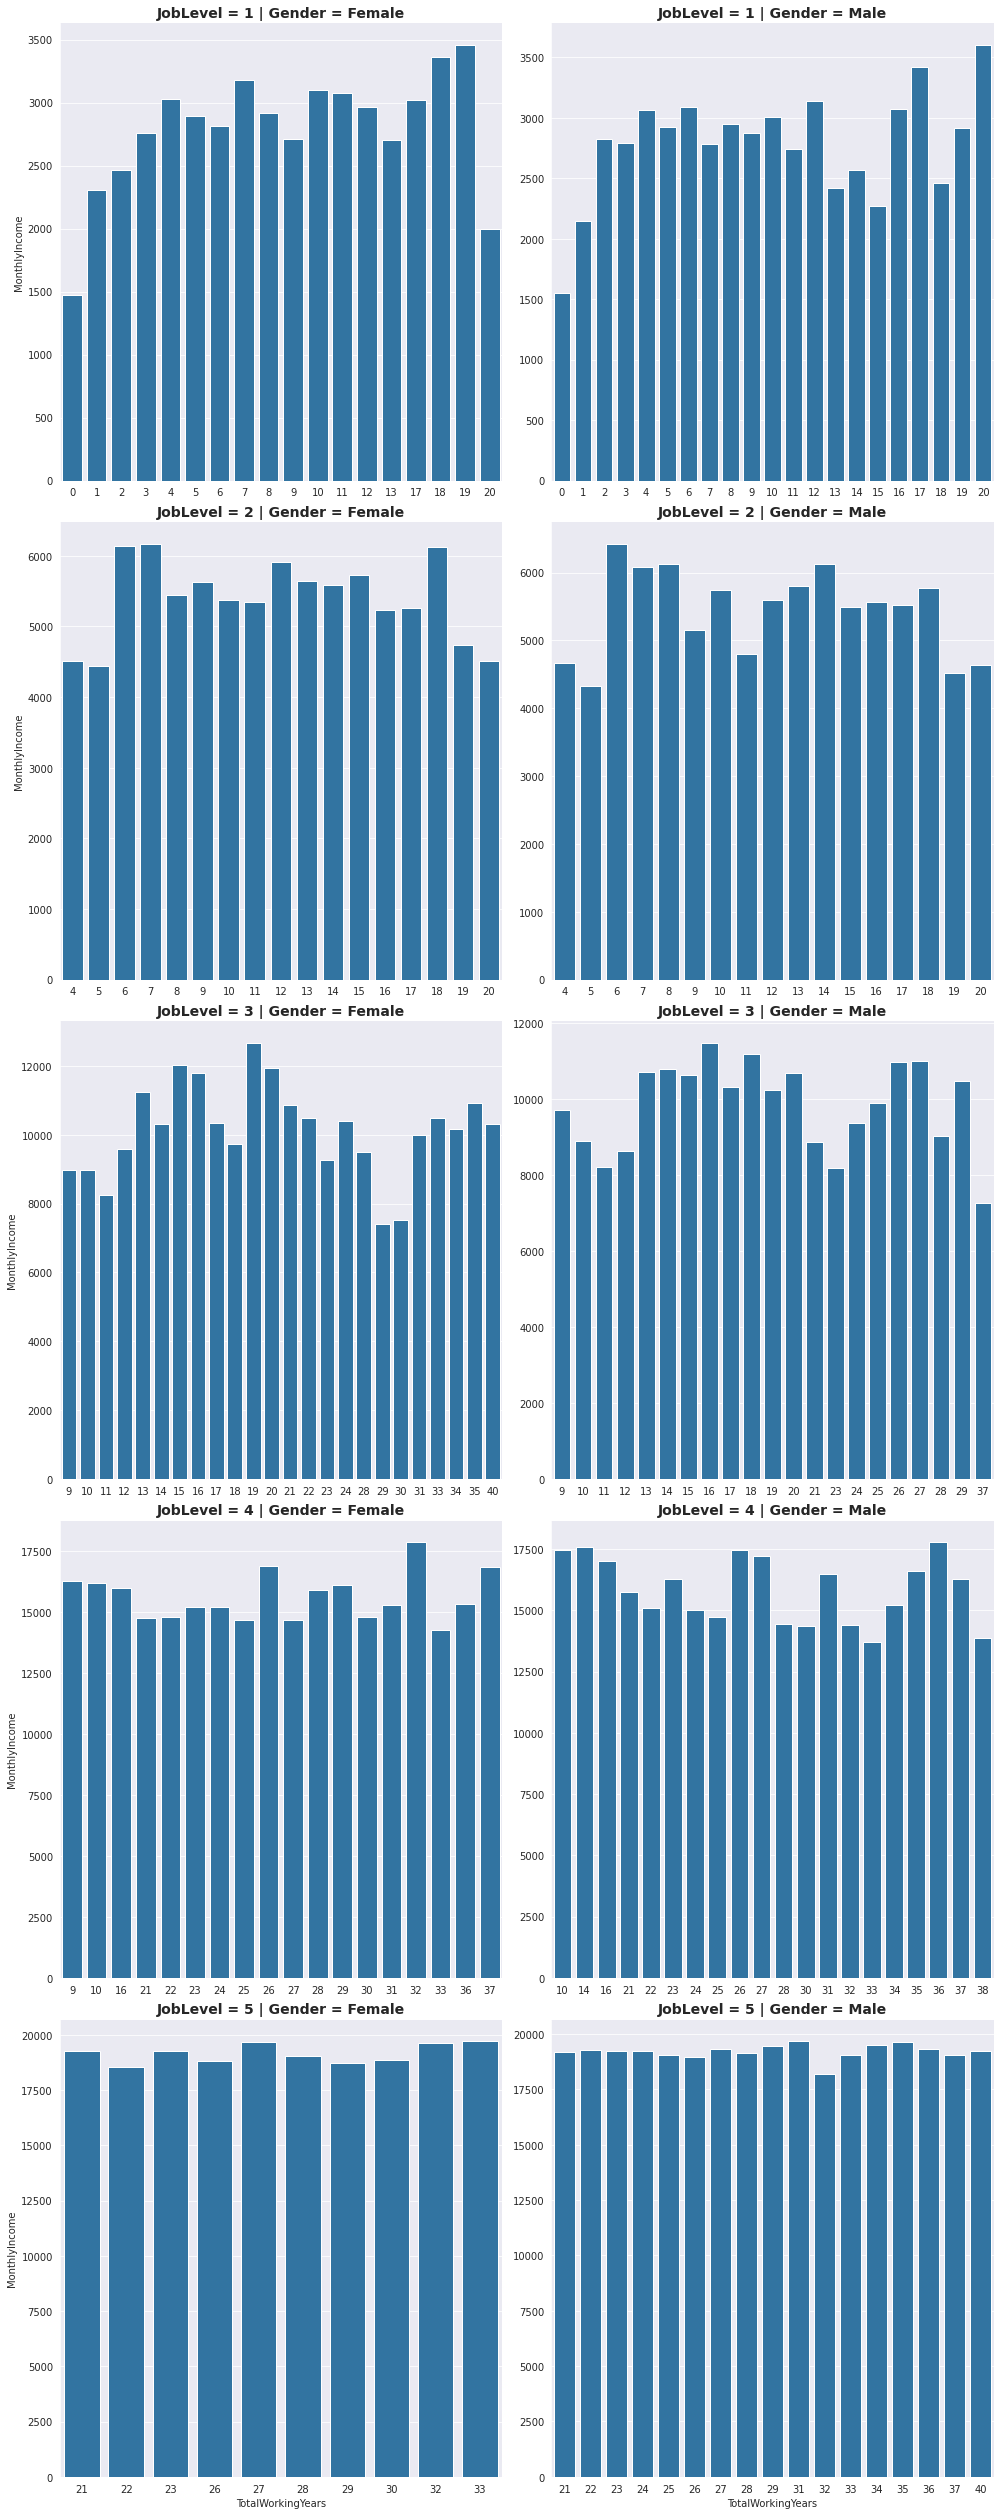

In [285]:
g = sns.FacetGrid(df, col='Gender' , row='JobLevel', height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='MonthlyIncome',ci=None)
g.set_titles(size=14, fontweight='bold')
plt.show()

### Renda mensal por idade pelo nível de trabalho

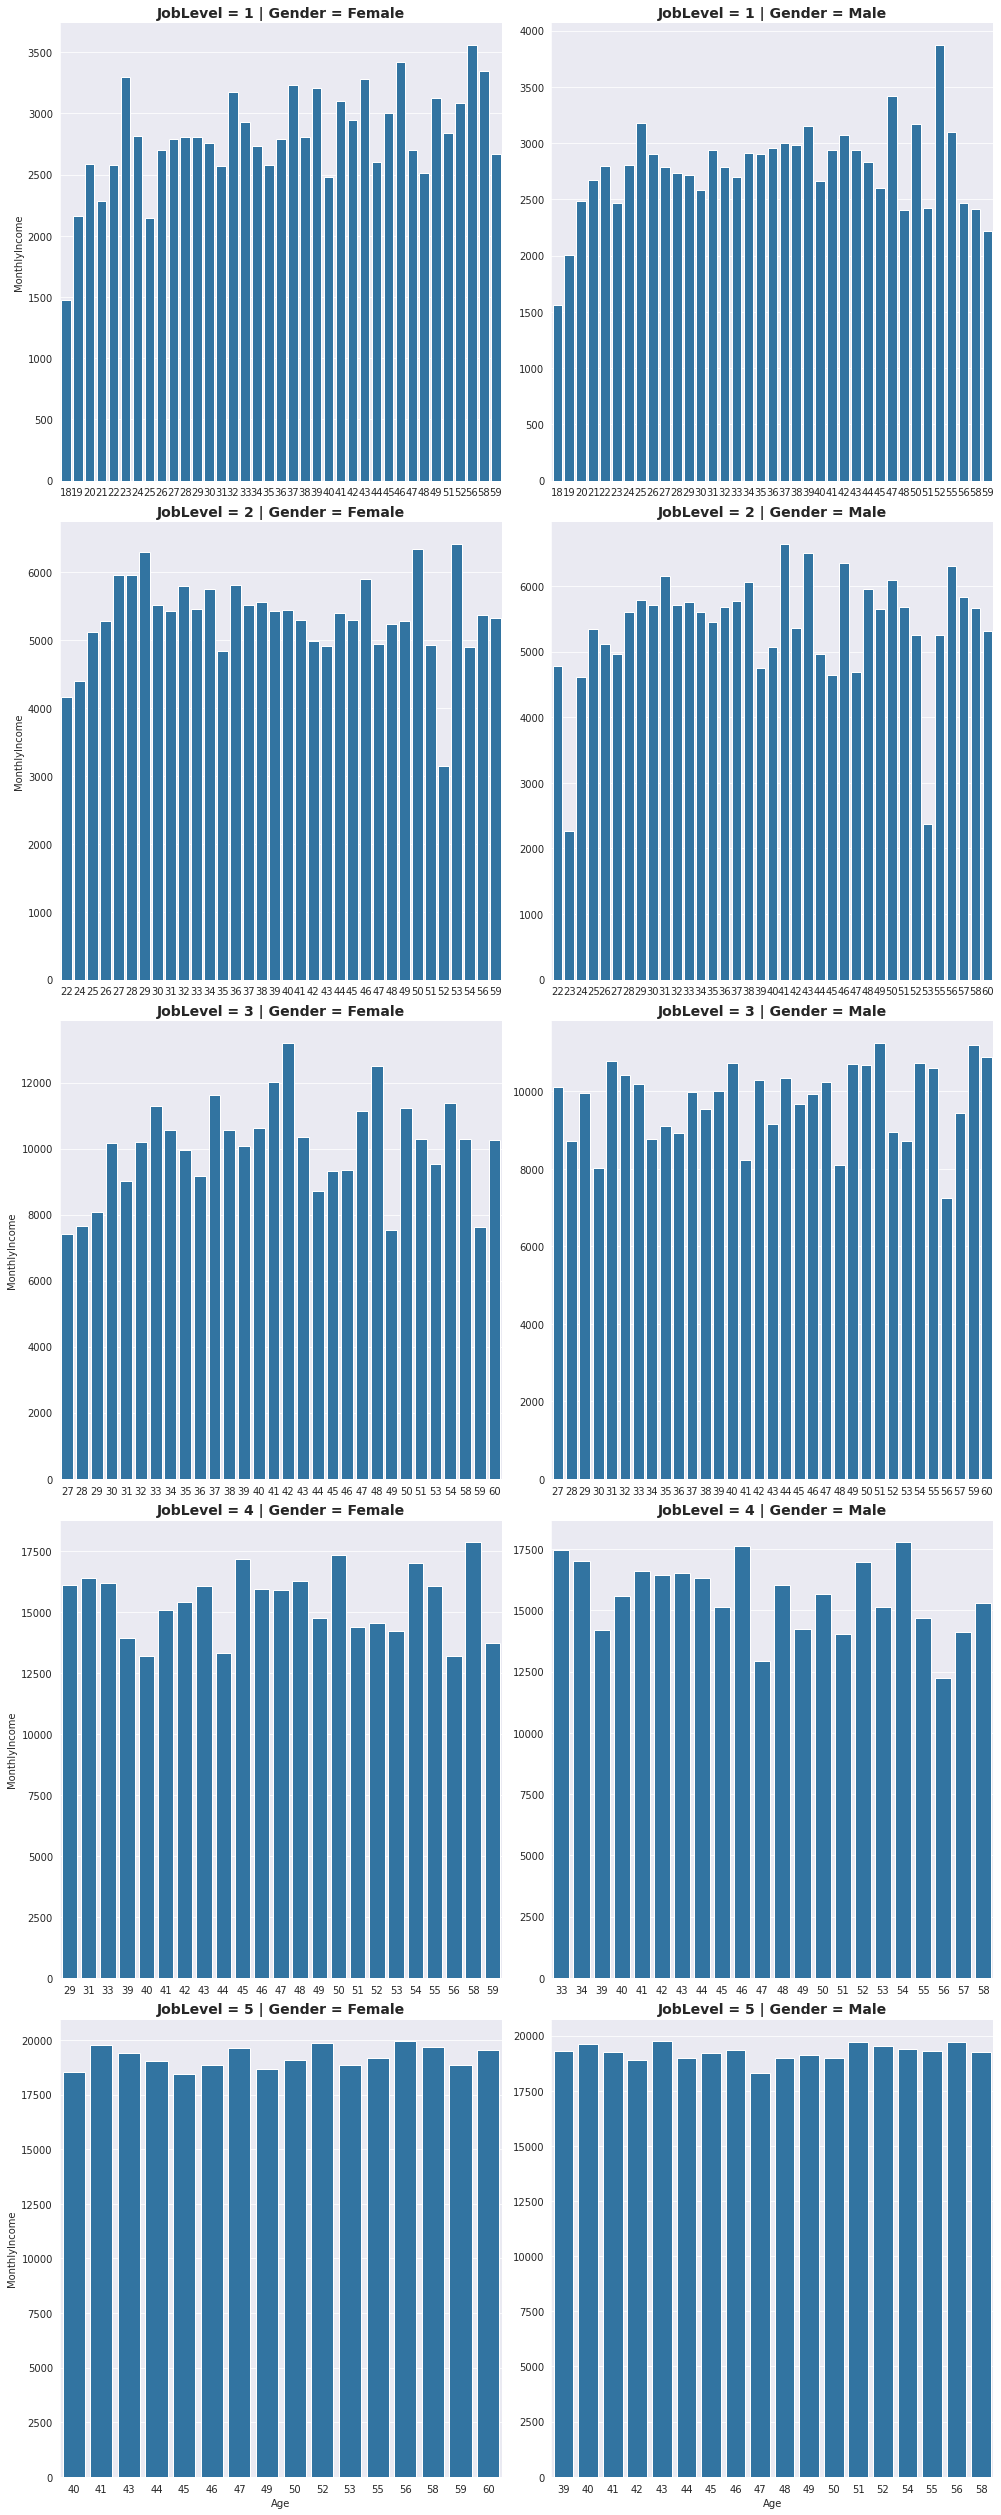

In [286]:
g = sns.FacetGrid(df, col='Gender' , row='JobLevel', height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Age',y='MonthlyIncome',ci=None)
g.set_titles(size=14, fontweight='bold')
plt.show()

### Idade de quem trabalhou por mais tempo por nível de trabalho

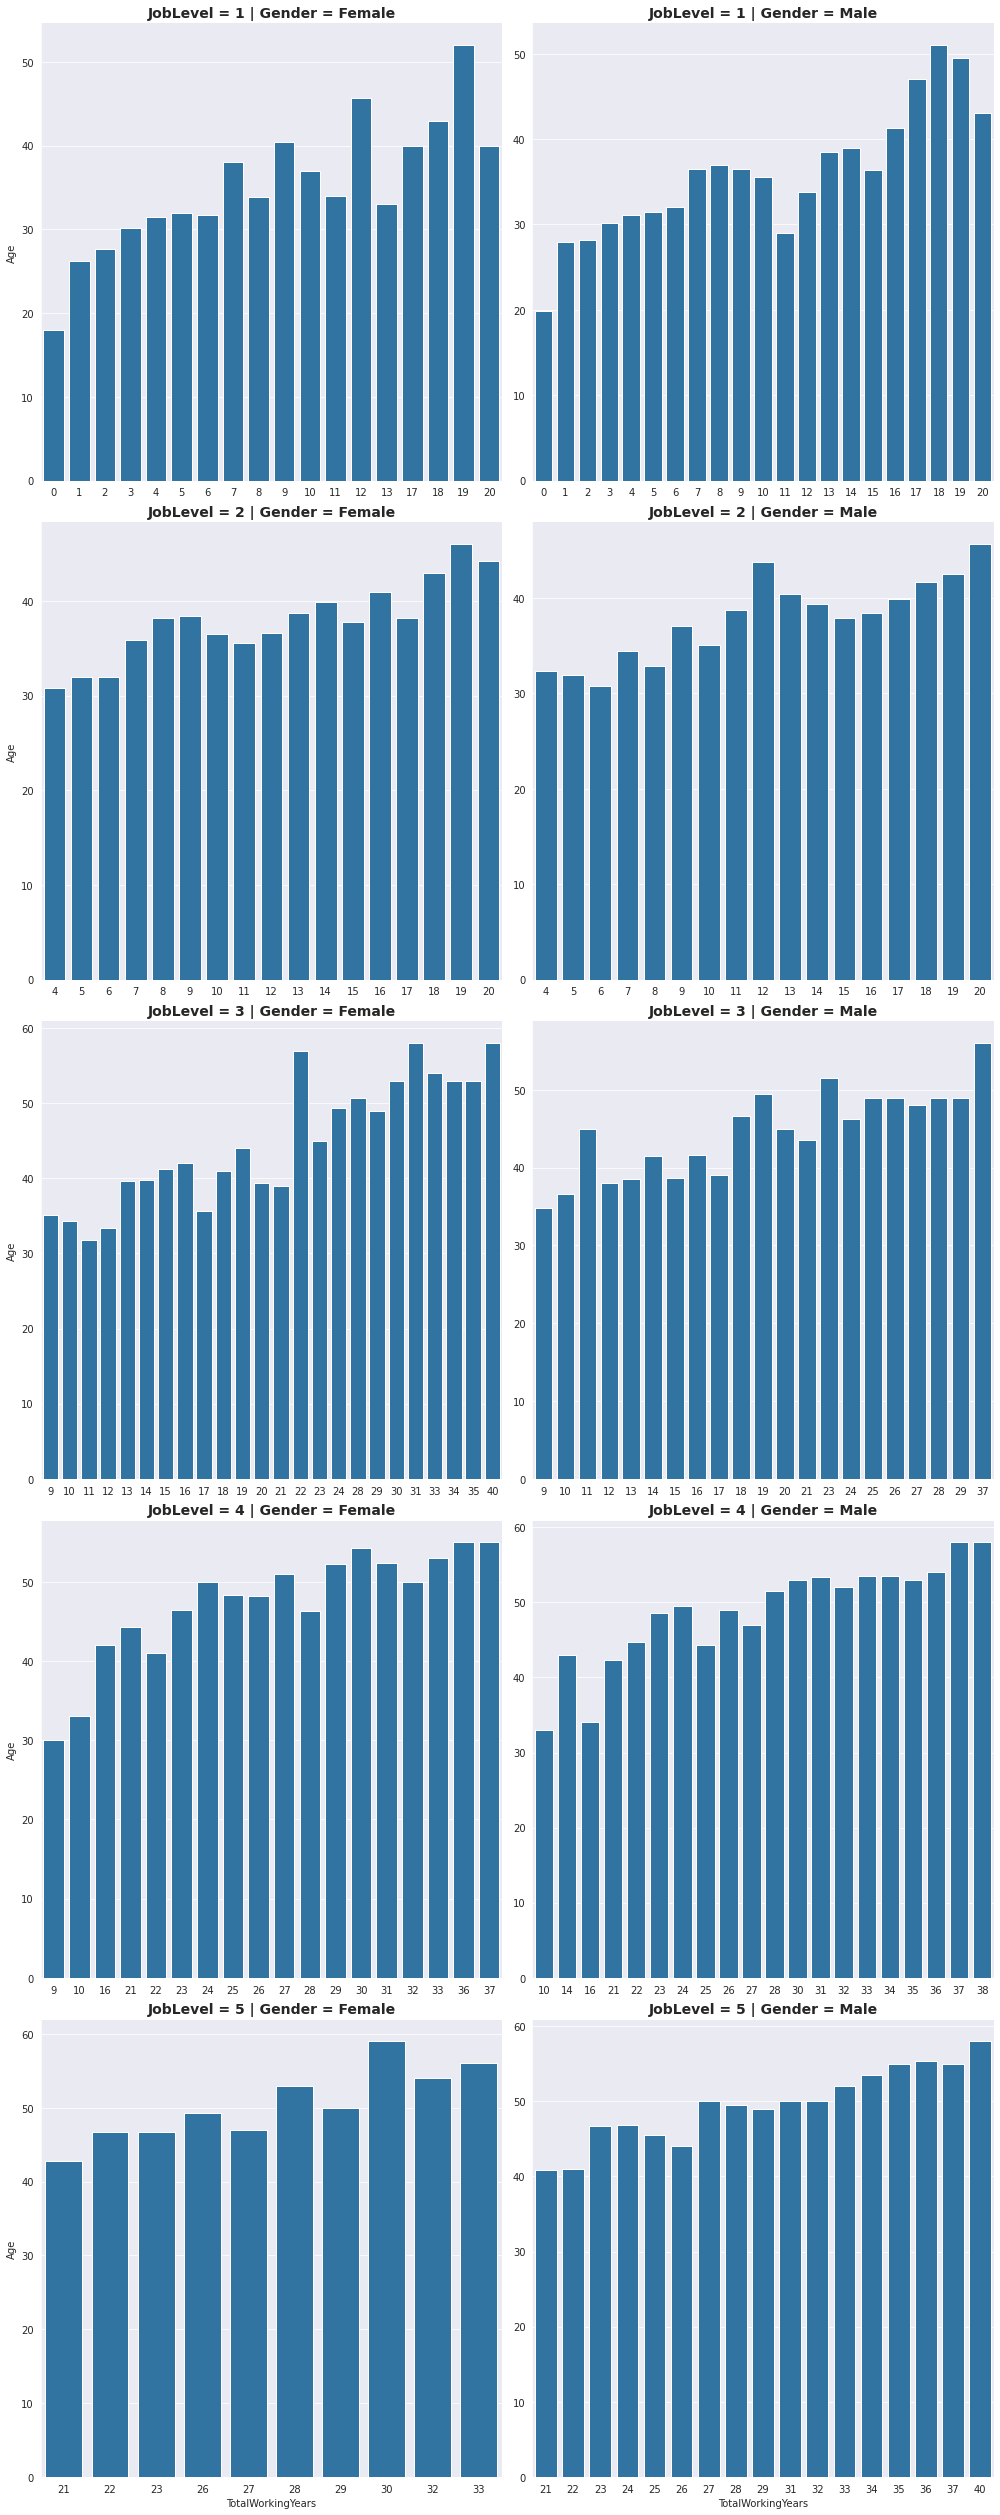

In [287]:
g = sns.FacetGrid(df, col='Gender' , row='JobLevel', height=7, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',ci=None)
g.set_titles(size=14, fontweight='bold')
plt.show()

### Renda mensal de quem trabalhou por mais tempo em cada departamento

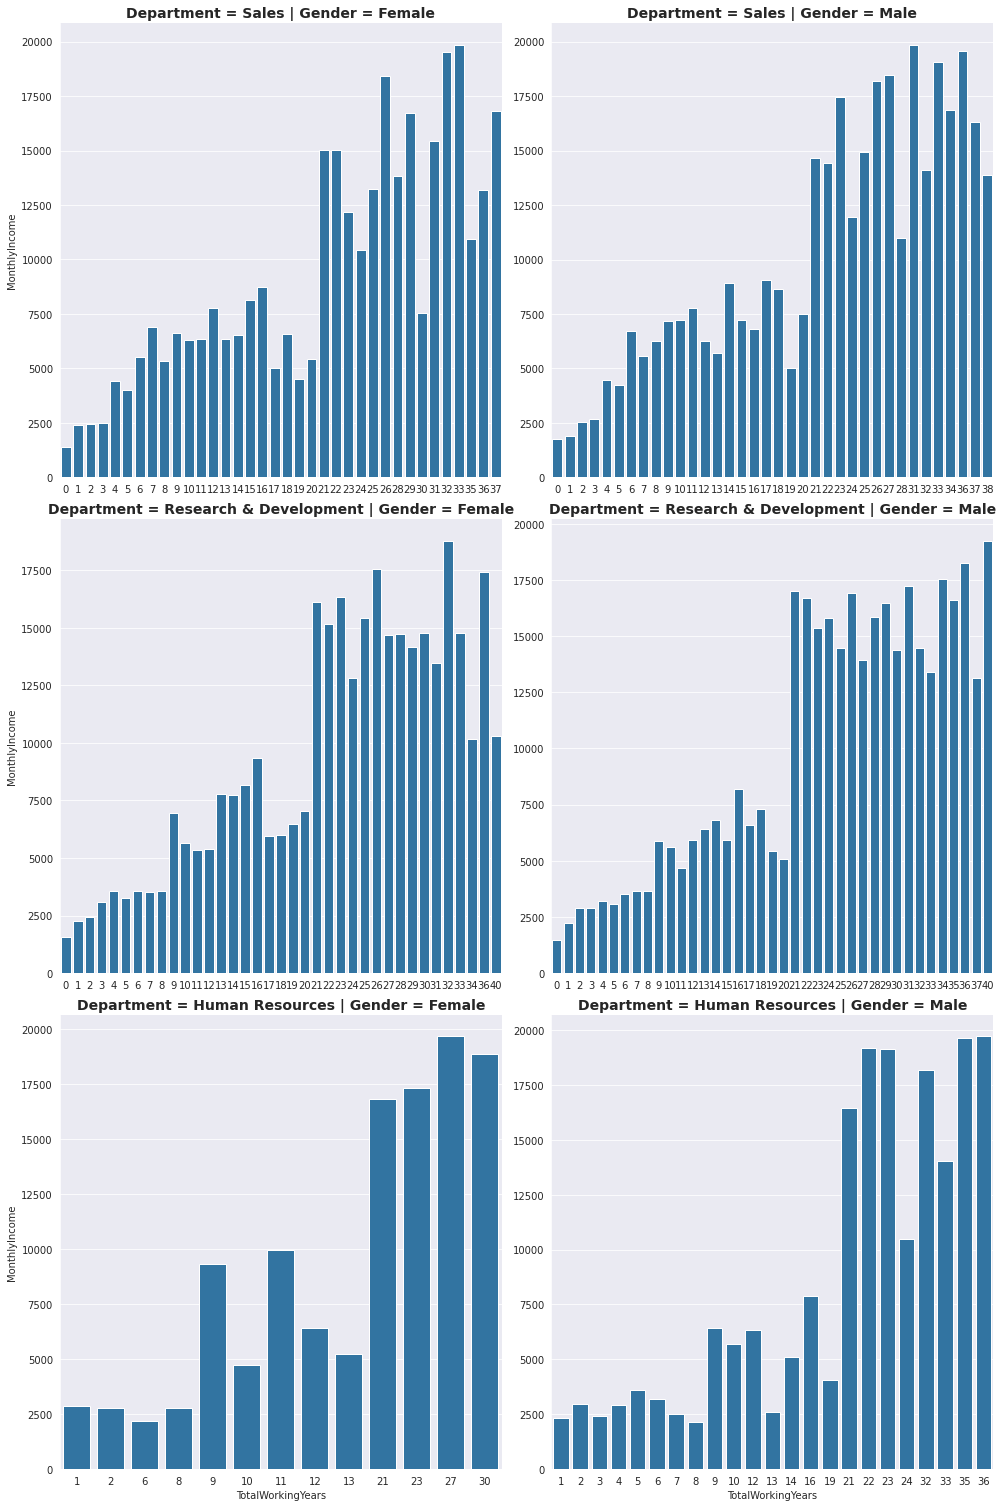

In [288]:
g = sns.FacetGrid(df, col='Gender' , row='Department', height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='MonthlyIncome',ci=None)
g.set_titles(size=14, fontweight='bold')
plt.show()

### Renda mensal de quem trabalhou por mais tempo por nível de educacional

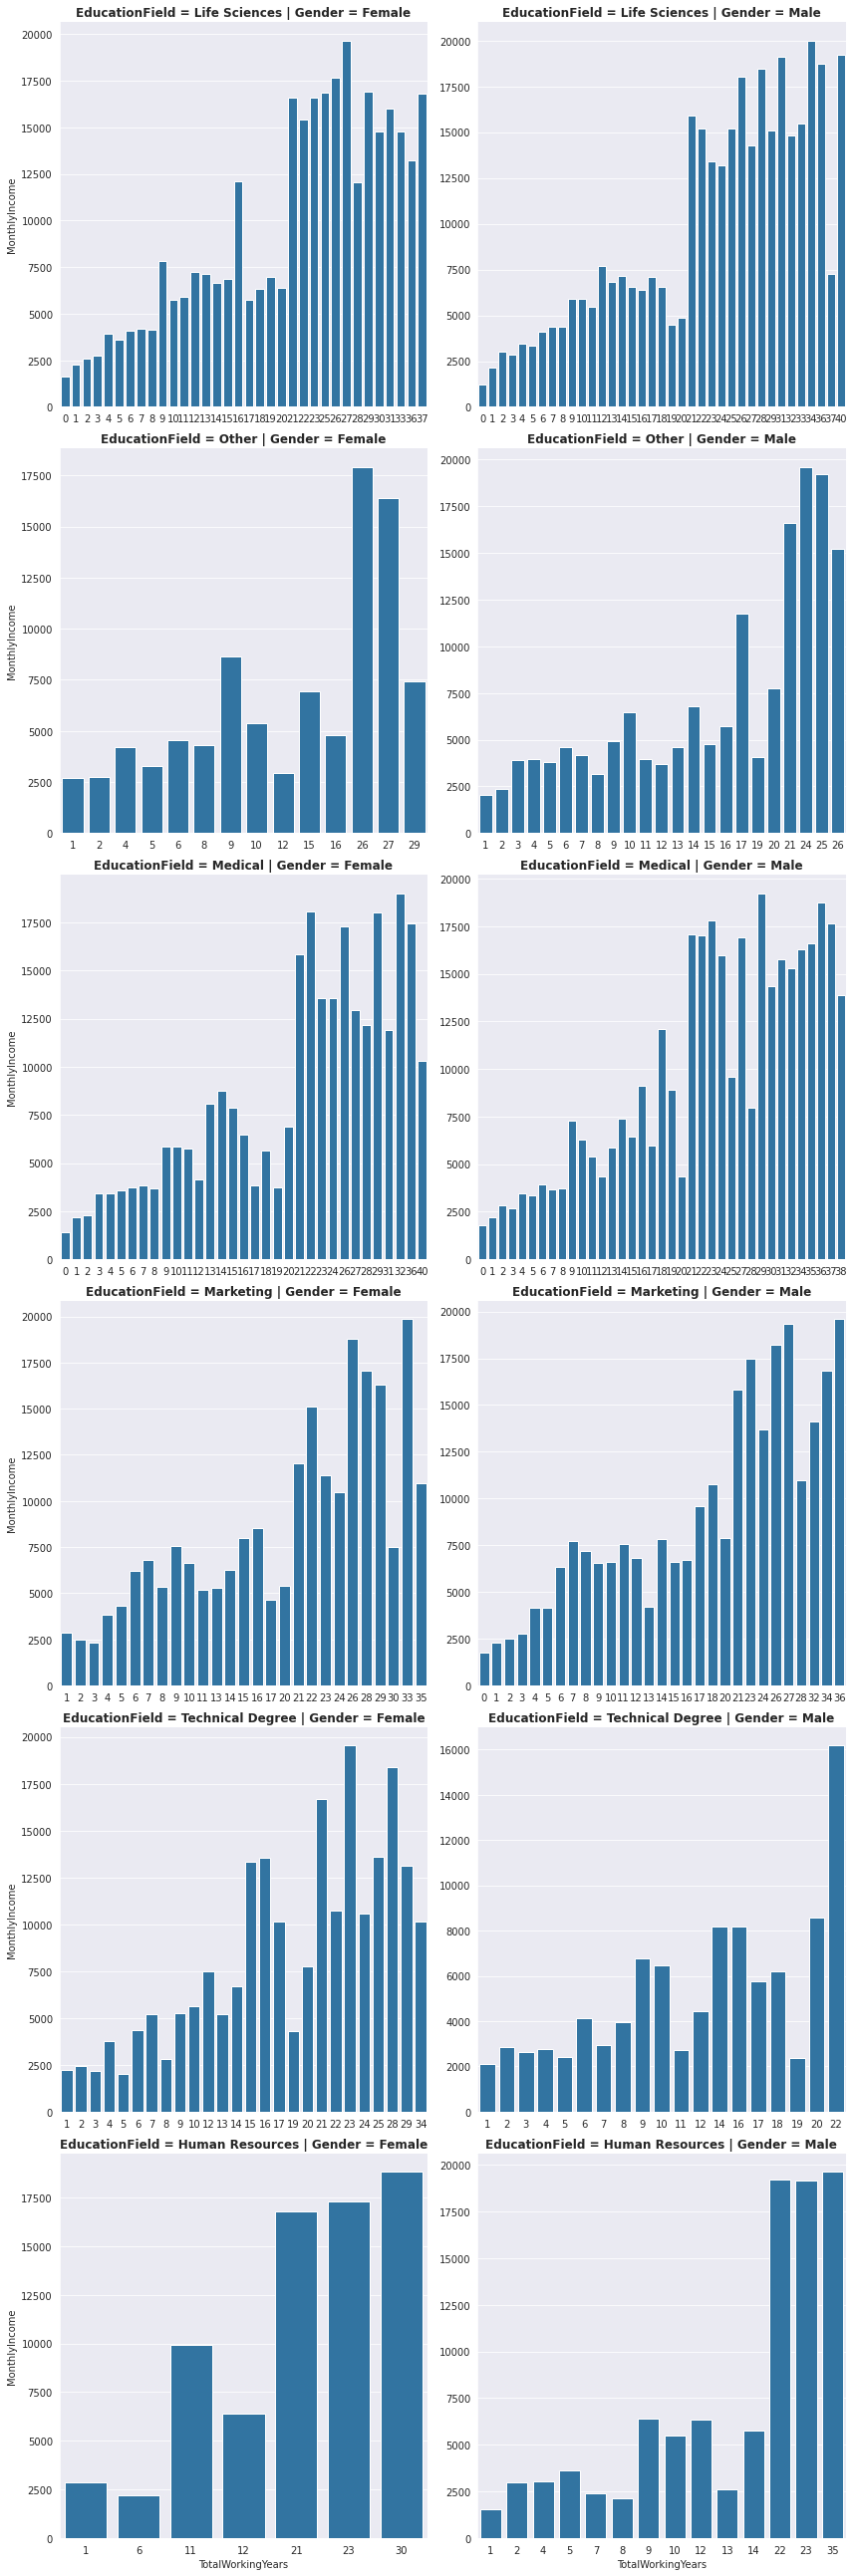

In [289]:
g = sns.FacetGrid(df, col='Gender' , row='EducationField', height=6,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='MonthlyIncome',ci=None)
g.set_titles(size=12, fontweight='bold')
plt.show()

### Renda mensal de quem trabalhou por mais tempo pelo cargo de trabalho

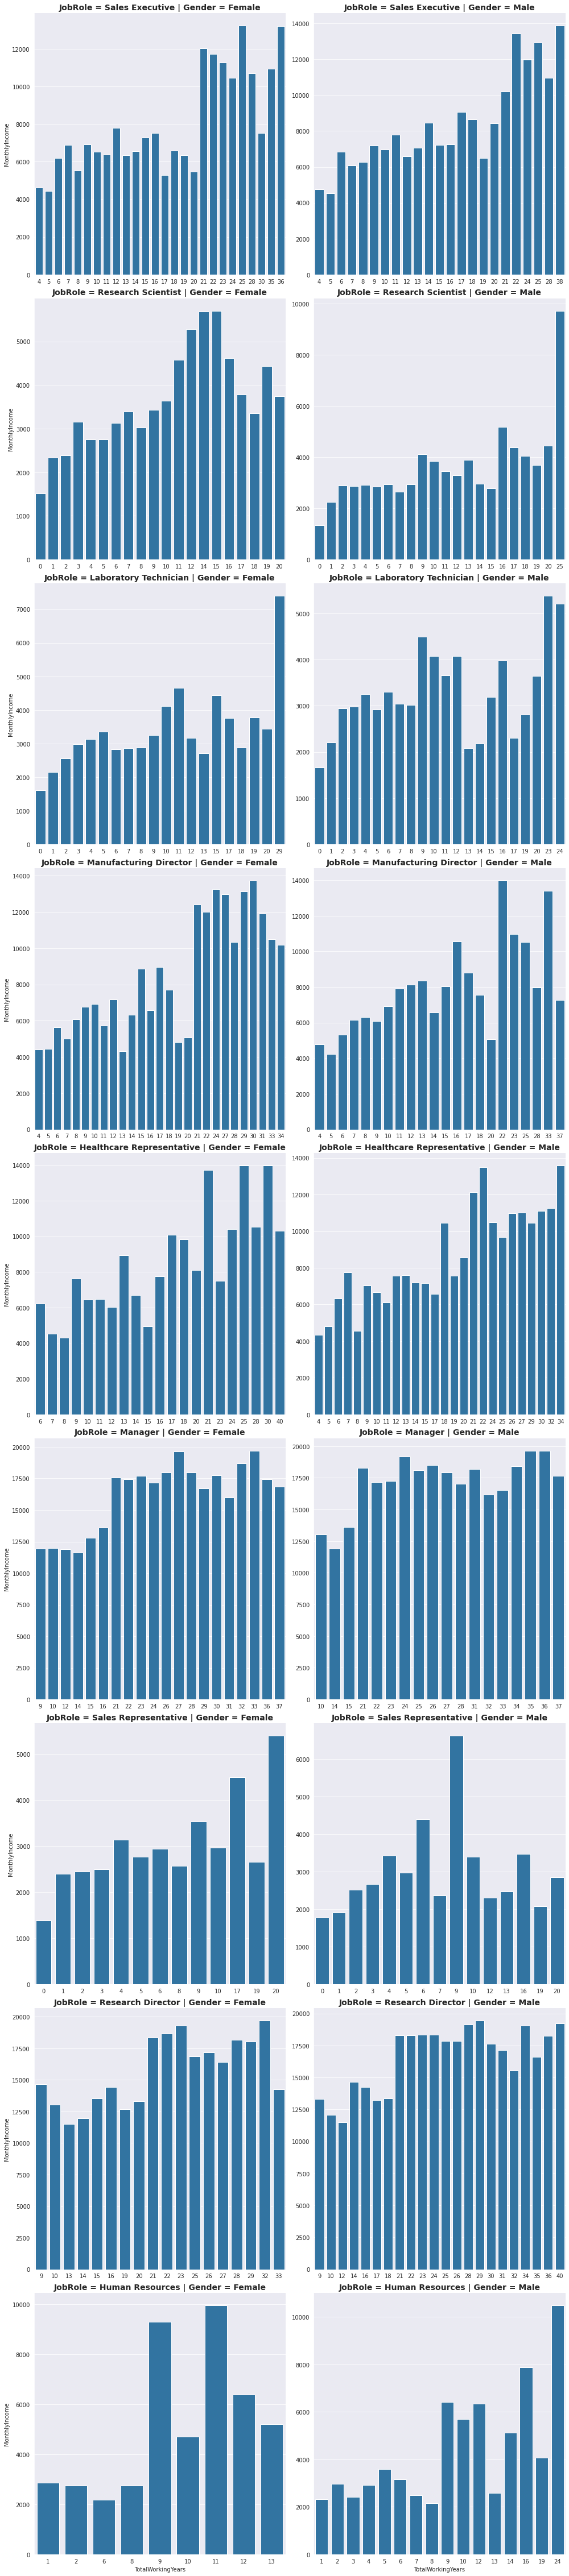

In [290]:
g = sns.FacetGrid(df, col='Gender' , row='JobRole', height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='MonthlyIncome',ci=None)
g.set_titles(size=14, fontweight='bold')
plt.show()

### Atrito devido aos anos trabalhados na empresa e cargo de trabalho

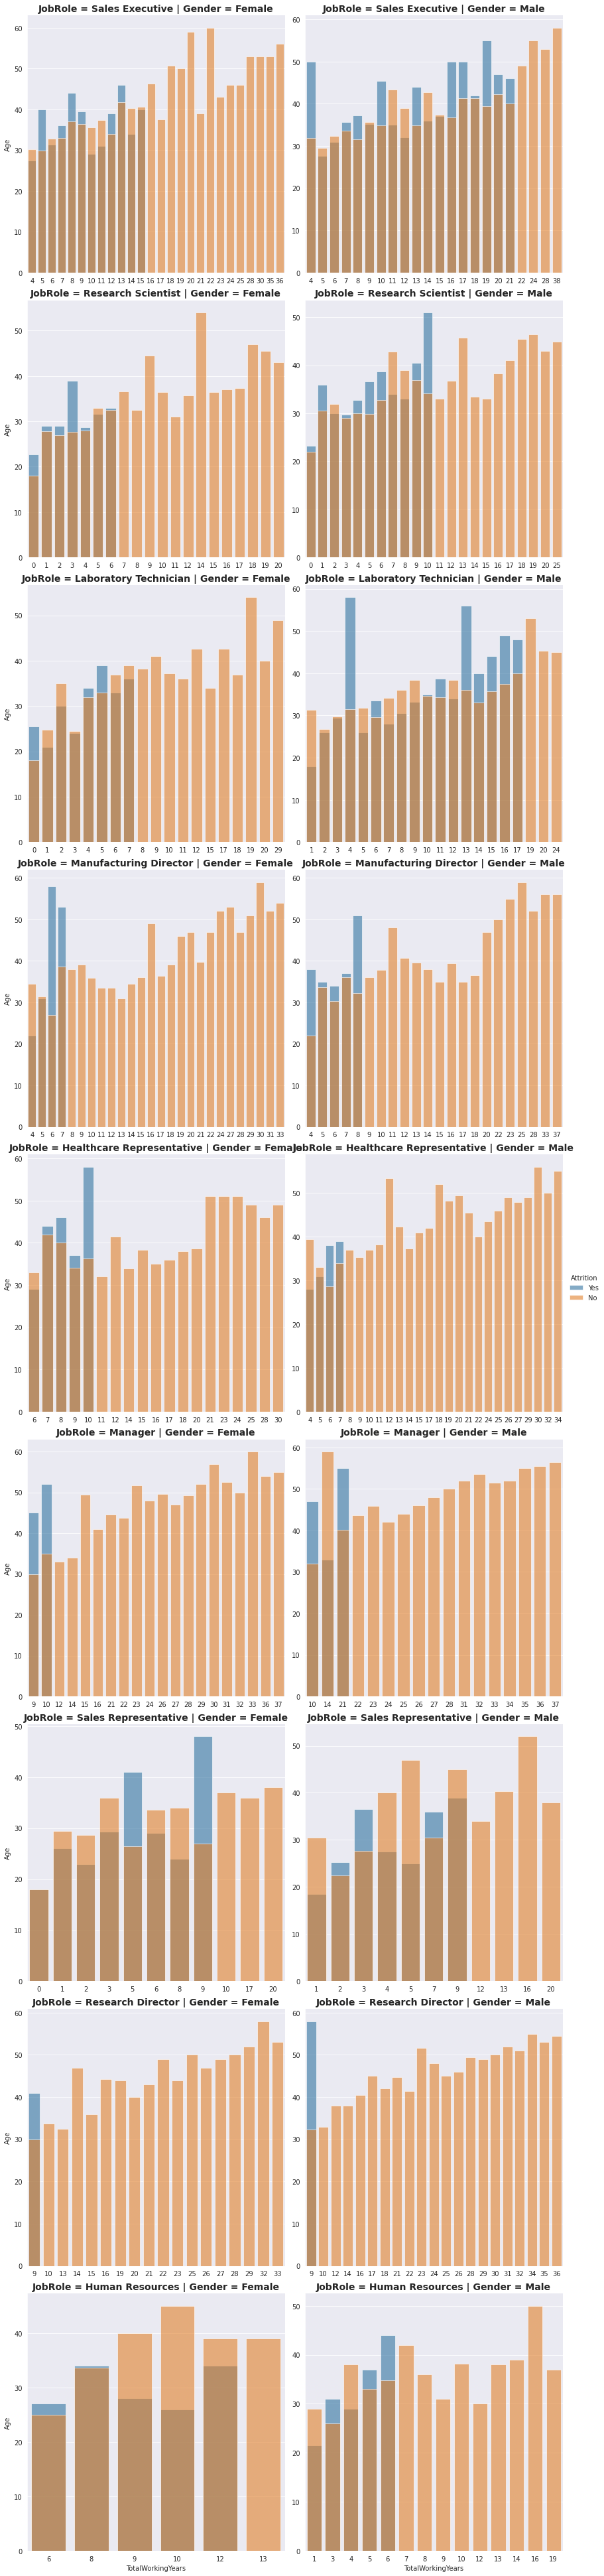

In [291]:
g = sns.FacetGrid(df, col='Gender' , row='JobRole', hue='Attrition', height=6,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',alpha=0.6,ci=None)
g.set_titles(size=14, fontweight='bold')
g.add_legend()
plt.show()

### Atrito devido aos anos trabalhados na empresa em cada departamento

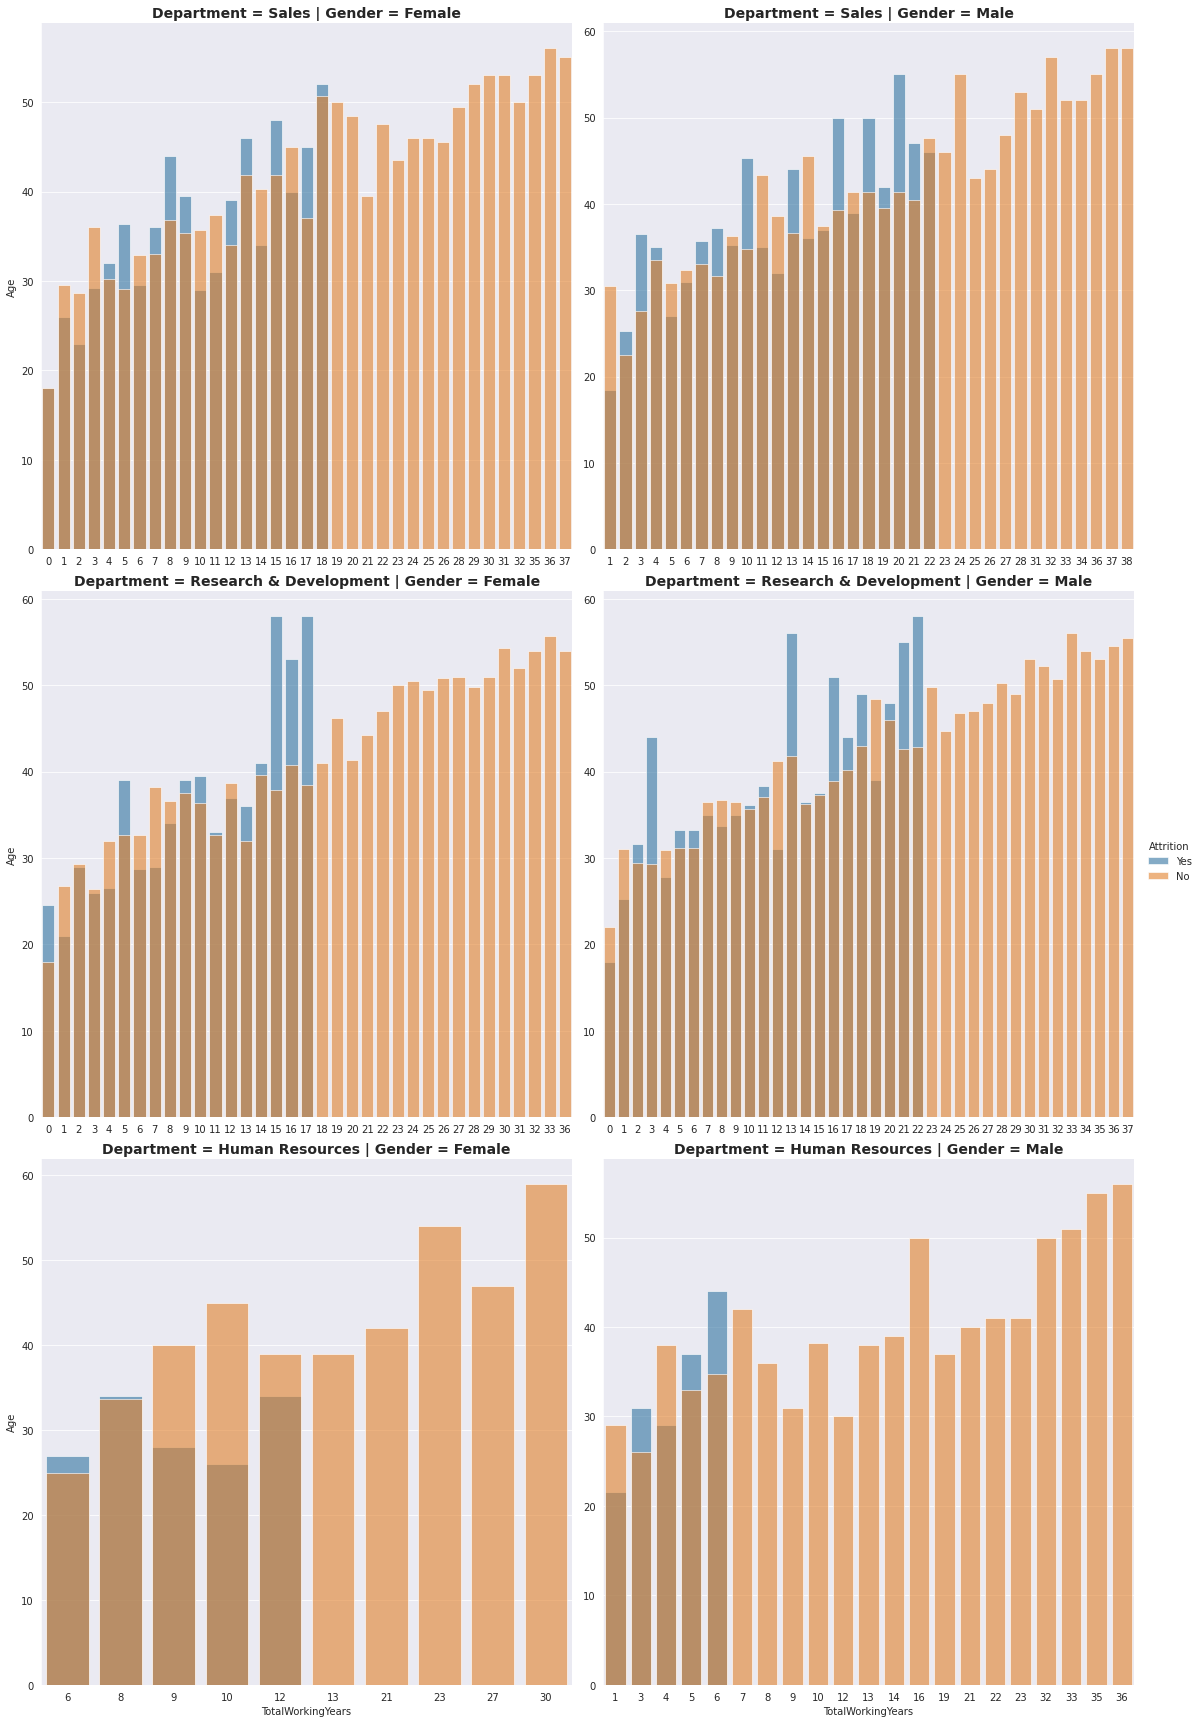

In [292]:
g = sns.FacetGrid(df, col='Gender' , row='Department', hue='Attrition', height=8,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',alpha=0.6,ci=None)
g.set_titles(size=14, fontweight='bold')
g.add_legend()
plt.show()

### Atrito devido aos anos trabalhados na empresa e por viagem a serviço

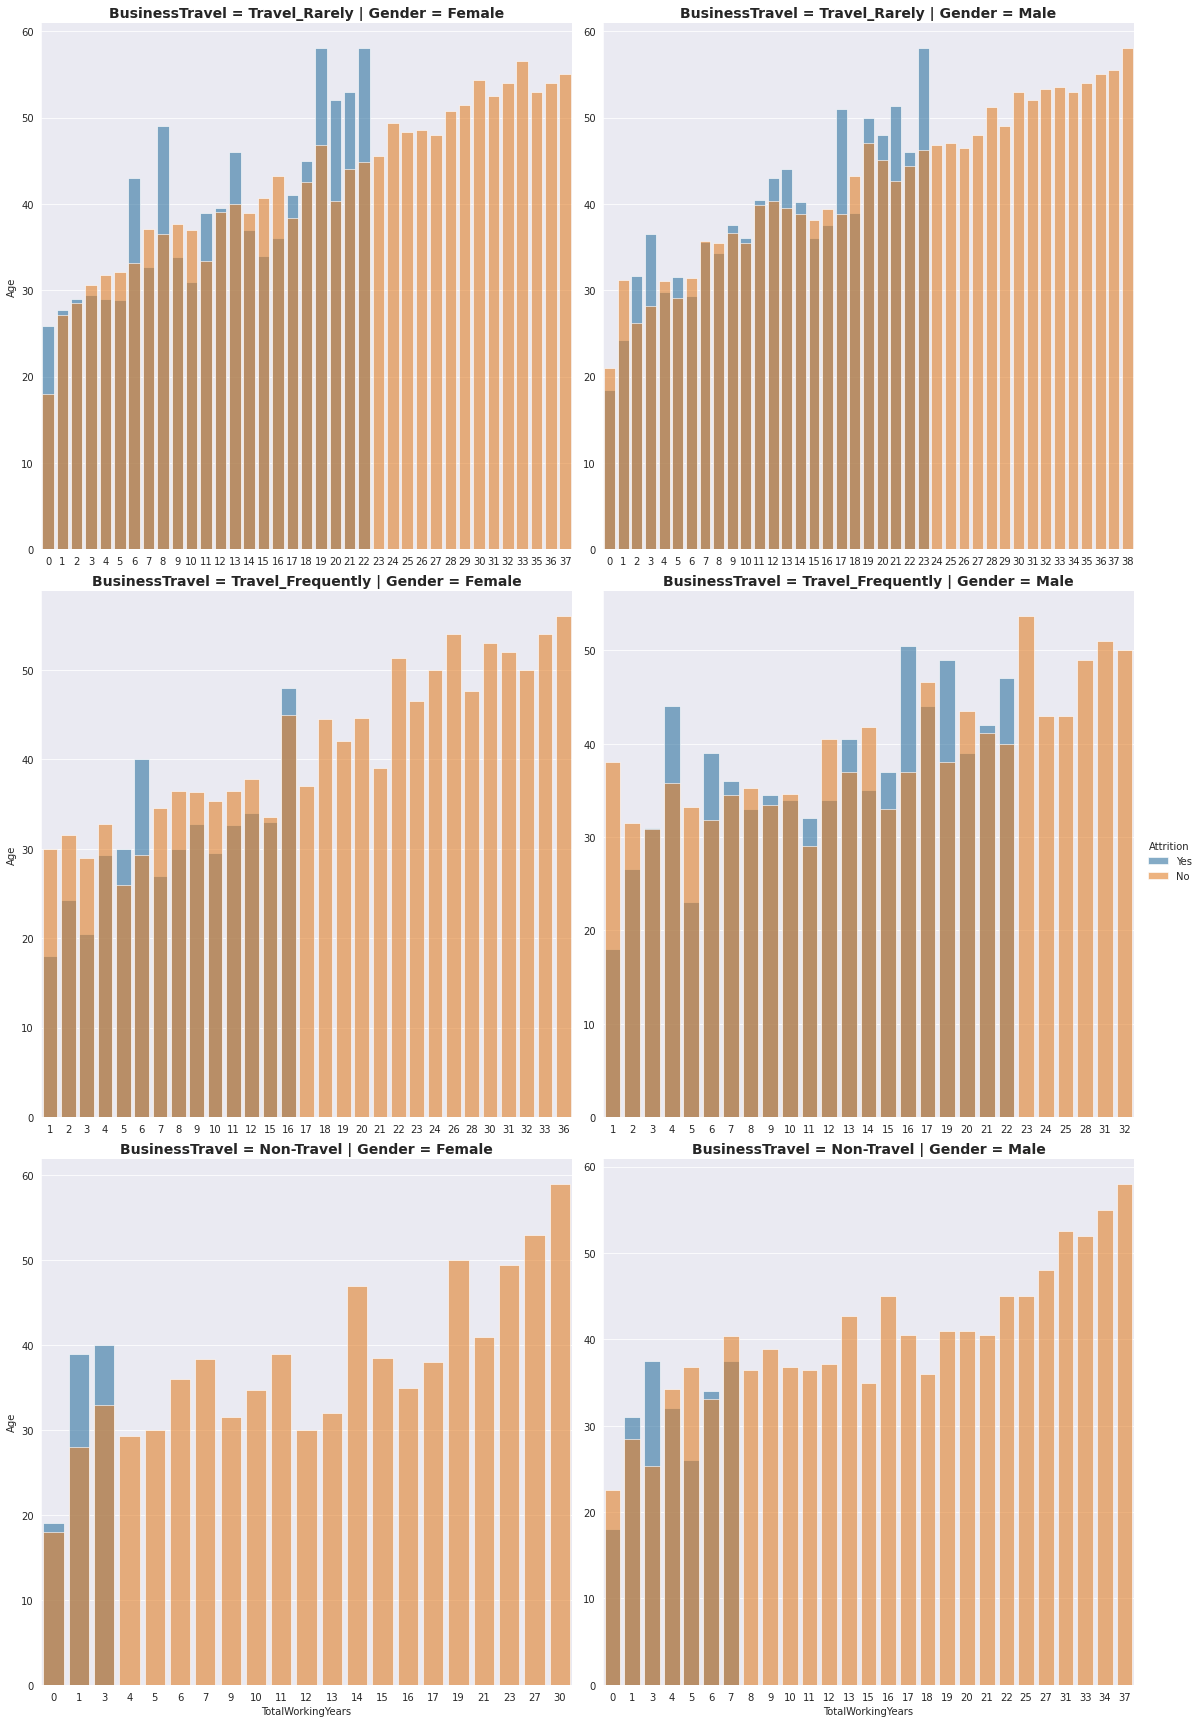

In [293]:
g = sns.FacetGrid(df, col='Gender', row='BusinessTravel', hue='Attrition', height=8,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',alpha=0.6,ci=None)
g.set_titles(size=14, fontweight='bold')
g.add_legend()
plt.show()

### Atrito por anos trabalhados na empresa e estado civil 

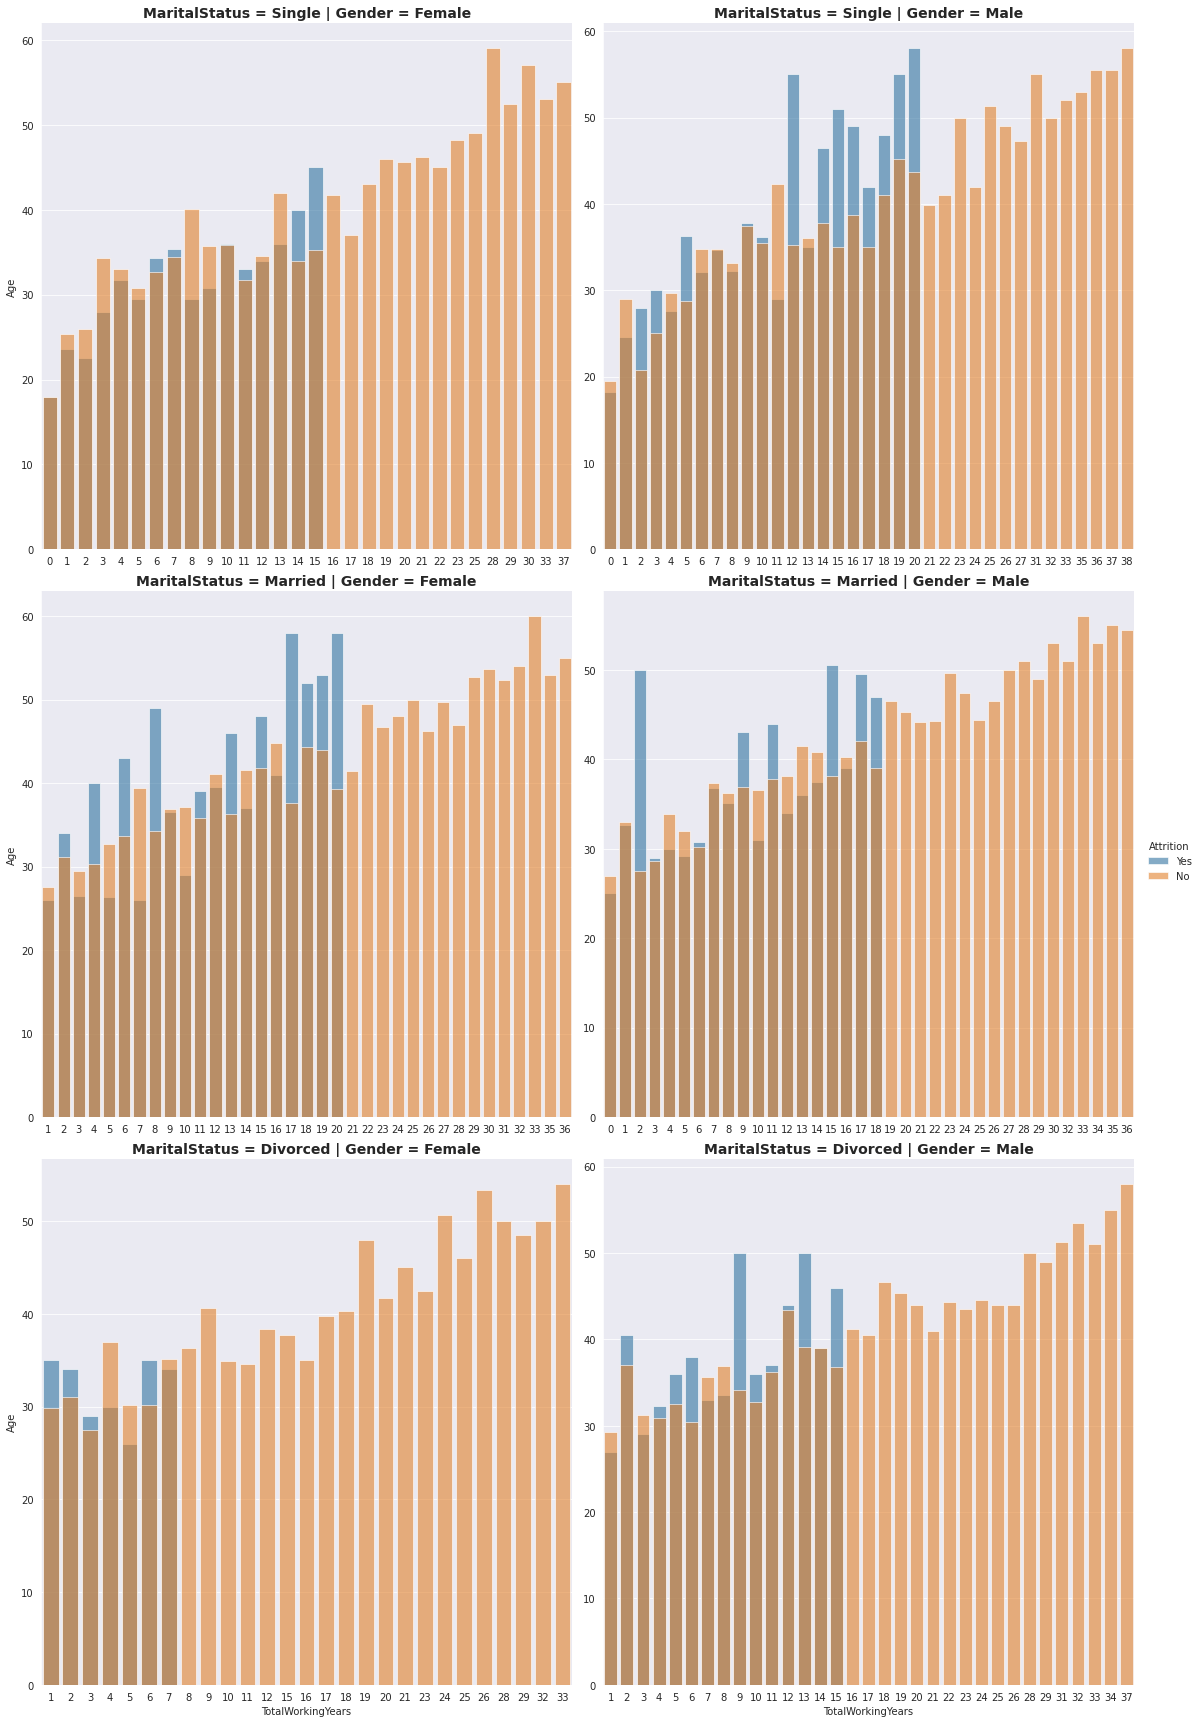

In [294]:
g = sns.FacetGrid(df, col='Gender', row='MaritalStatus', hue='Attrition', height=8,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',alpha=0.6,ci=None)
g.set_titles(size=14, fontweight='bold')
g.add_legend()
plt.show()

### Hora extra por departamento

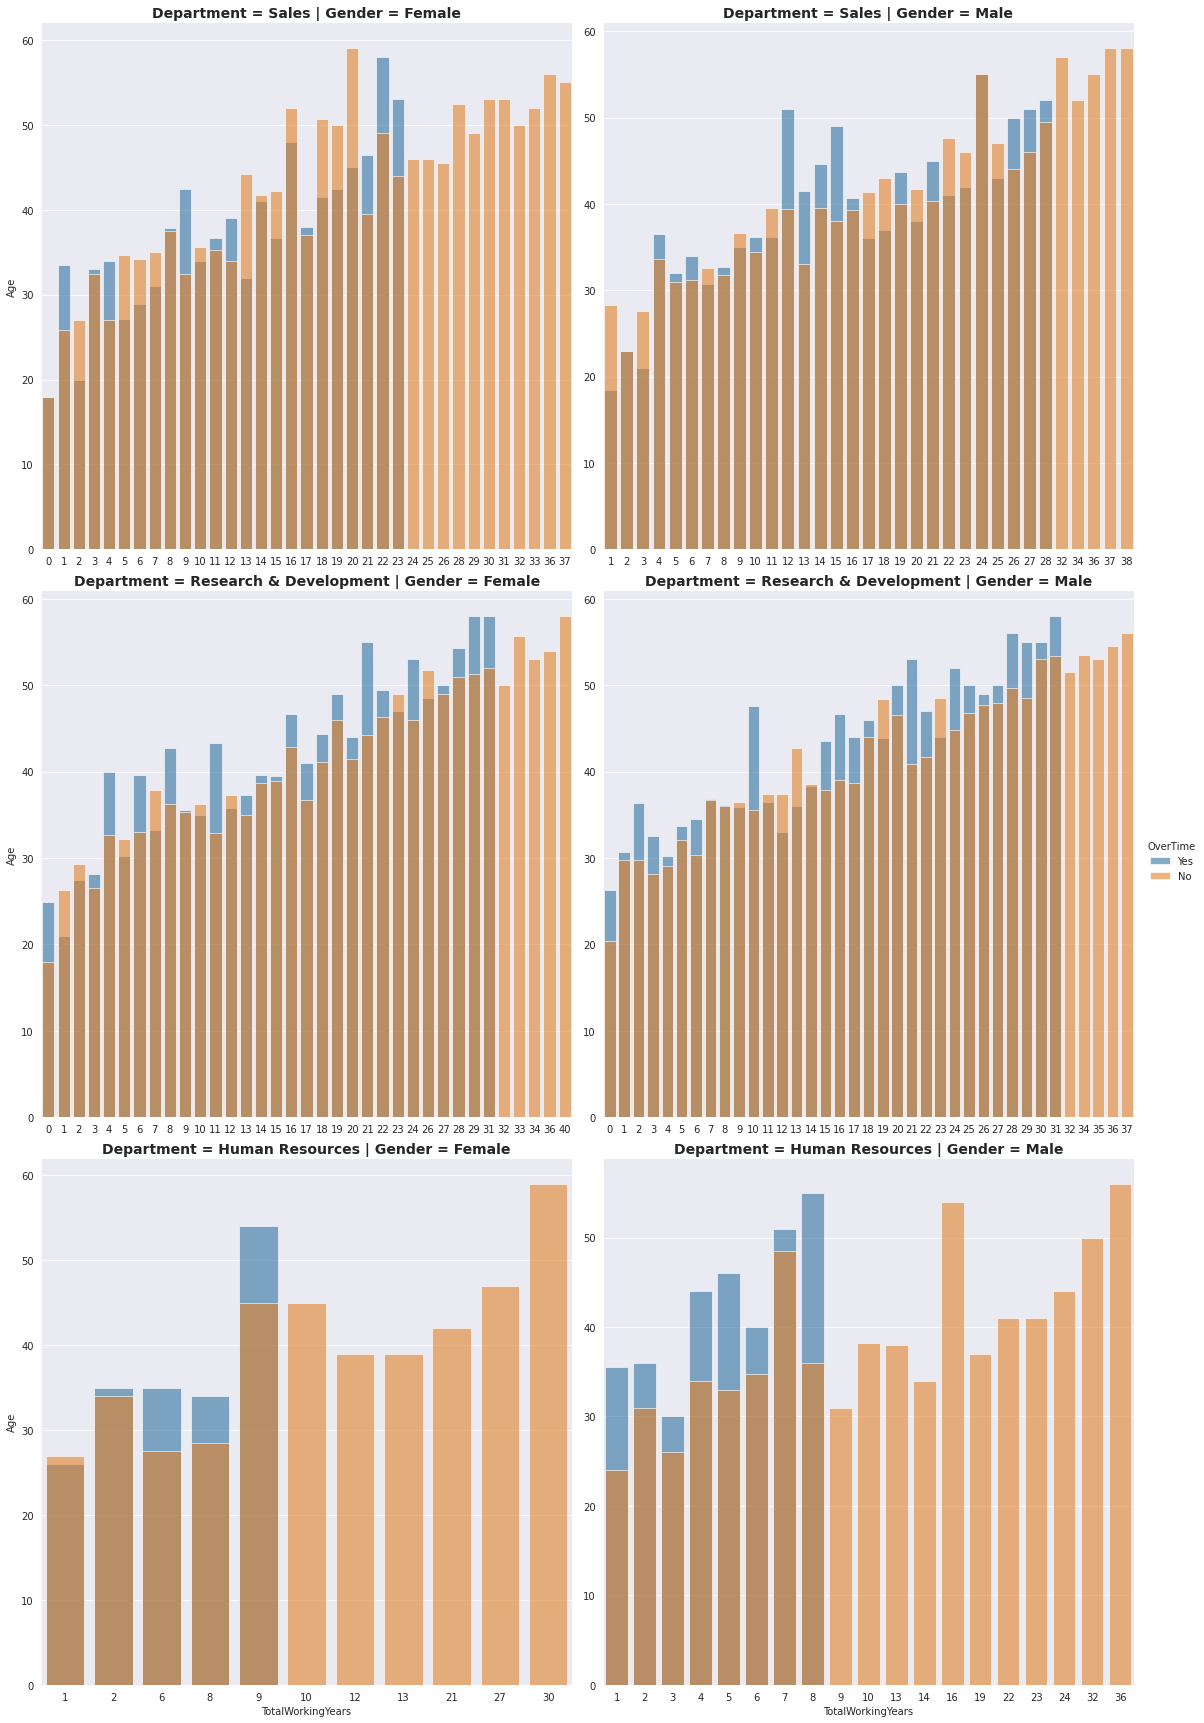

In [295]:
g = sns.FacetGrid(df, col='Gender', row='Department', hue='OverTime', height=8,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='TotalWorkingYears',y='Age',alpha=0.6,ci=None)
g.set_titles(size=14, fontweight='bold')
g.add_legend()
plt.show()